#### Python 3.8.11




##### Hourly energy consumption 
 
    PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is 
    part of the Eastern Interconnection grid operating an electric transmission system serving all or parts 
    of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, 
    Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia. 

    The hourly power consumption data comes from PJM's website and are in megawatts (MW). 

    The regions have changed over the years so data may only appear for certain dates per region. 

## Source  of data

[Hourly Energy Consumption](https://www.kaggle.com/robikscube/hourly-energy-consumption)




# Abstract

Data science encompasses preparing data for analysis, including cleansing, aggregating, and manipulating the data to perform advanced data analysis and use these analysis results to understand a system better and try to predict it.
It is often challenging to find a suitable model for predicting a given and complex problem. Hence, throughout this project, we worked and implemented a machine learning model for predicting and analyzing the PJM Hourly Energy Consumption.  
The project consists of three parts:
 The first part is data preprocessing and cleaning: The dataset has 12 CSV files which contain DateTime by hourly and energy consumption.  Each data set was loaded separately and concatenated together to get a more understandable format. Thus, the Nan-value and duplicated drop method were implemented, and more features such as day of the week, month, year, day session, workdays, and the season were added to improve data efficiency. 
The second part is the visualization of the concatenated data frame. Several graphs and diagrams were plotted using the different plotting libraries in order to describe the improved dataset. By using different graphs, we assisted us better comprehending our data and identifying the essential features
The final part is feature selection and implantation of the machine learning model. In this part, before the machine learning model, some functions were created to scale, split and encode the improved data frame. The dataset was split into two sequential training and test set using our own function instead of random sampling splitting. Due to times series, non-linearity, and regression-based tasks, the MLPRegressor model was implemented, which is part Recurrent Neural Network model.


# Introduction

Machine learning is a valuable technique for predicting values and discovering patterns out of large quantities of data.  Over time several approaches have been introduced to solve, predict and analyze a given problem.  
  
Data science encompasses preparing data for analysis, including cleansing, aggregating, and manipulating the data to perform advanced data analysis and use these analysis results to understand a system better and try to predict it.
It is often challenging to find a suitable model for predicting a given and complex problem. Hence, throughout this project, we worked and implemented a machine learning model for predicting and analyzing the PJM Hourly Energy Consumption.  
The project consists of three parts:
 The first part is data preprocessing and cleaning: The dataset has 12 CSV files which contain DateTime by hourly and energy consumption.  Each data set was loaded separately and concatenated together to get a more understandable format. Thus, the Nan-value and duplicated drop method were implemented, and more features such as day of the week, month, year, day session, workdays, and the season were added to improve data efficiency. 
The second part is the visualization of the concatenated data frame. Several graphs and diagrams were plotted using the different plotting libraries in order to describe the improved dataset. By using different graphs, we assisted us better comprehending our data and identifying the essential features
The final part is feature selection and implantation of the machine learning model. In this part, before the machine learning model, some functions were created to scale, split and encode the improved data frame. The dataset was split into two sequential training and test set using our own function instead of random sampling splitting. Due to times series, non-linearity, and regression-based tasks, the MLPRegressor model was implemented, which is part Recurrent Neural Network model.


# IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from datetime              import datetime, timedelta
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics       import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings( 'ignore' )

#  Loading Data

#### In this data set in Kaggel, data were avalibe in two shape, 12 CSV files for each individual region, and one CSV file inclue all.

#### To avoid getting NAN values in our dataframe, we decided to load all 12 CSV files.

In [2]:
aep = pd.read_csv( 'data/AEP_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
aep['Datetime']=pd.to_datetime(aep['Datetime']);aep.sort_values(by='Datetime')

comed = pd.read_csv( 'data/COMED_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
comed['Datetime']=pd.to_datetime(comed['Datetime']);comed.sort_values(by='Datetime')

dayton = pd.read_csv( 'data/DAYTON_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
dayton['Datetime']=pd.to_datetime(dayton['Datetime']);dayton.sort_values(by='Datetime')

deok = pd.read_csv( 'data/DEOK_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
deok['Datetime']=pd.to_datetime(deok['Datetime']);deok.sort_values(by='Datetime')

dom = pd.read_csv( 'data/DOM_hourly.csv' ).drop_duplicates(subset='Datetime',keep='last',inplace=False)
dom['Datetime']=pd.to_datetime(dom['Datetime']);dom.sort_values(by='Datetime')

duq = pd.read_csv( 'data/DUQ_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
duq['Datetime']=pd.to_datetime(duq['Datetime']);duq.sort_values(by='Datetime')

ekpc = pd.read_csv( 'data/EKPC_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
ekpc['Datetime']=pd.to_datetime(ekpc['Datetime']);ekpc.sort_values(by='Datetime')

fe = pd.read_csv( 'data/FE_hourly.csv' ).drop_duplicates(subset='Datetime',keep='last',inplace=False)
fe['Datetime']=pd.to_datetime(fe['Datetime']);fe.sort_values(by='Datetime')

ni = pd.read_csv( 'data/NI_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
ni['Datetime']=pd.to_datetime(ni['Datetime']);ni.sort_values(by='Datetime')

pjm = pd.read_csv( 'data/PJM_Load_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
pjm['Datetime']=pd.to_datetime(pjm['Datetime']);pjm.sort_values(by='Datetime')

pjme = pd.read_csv( 'data/PJME_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
pjme['Datetime']=pd.to_datetime(pjme['Datetime']);pjme.sort_values(by='Datetime')

pjmw = pd.read_csv( 'data/PJMW_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
pjmw['Datetime']=pd.to_datetime(pjmw['Datetime']);pjmw.sort_values(by='Datetime')

Datetime  PJMW_MW
6574   2002-04-01 01:00:00   4374.0
6575   2002-04-01 02:00:00   4306.0
6576   2002-04-01 03:00:00   4322.0
6577   2002-04-01 04:00:00   4359.0
6578   2002-04-01 05:00:00   4436.0
...                    ...      ...
138090 2018-08-02 20:00:00   6545.0
138091 2018-08-02 21:00:00   6496.0
138092 2018-08-02 22:00:00   6325.0
138093 2018-08-02 23:00:00   5892.0
138094 2018-08-03 00:00:00   5489.0

[143202 rows x 2 columns]

#### To check with other data set, the dataframe with all region loaded.

In order to check for any desciprncy between 12 loaded files and big CSV file, they are compared region by region.

In [3]:
df_pjm = pd.read_csv( './data/pjm_hourly_est.csv')

In [4]:
print('The discrepancy between combined and separate file for AEP region is: {} rows'.format(abs(len(aep['AEP_MW'])-len(df_pjm['AEP'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for COMED region is: {} rows'.format(abs(len(comed['COMED_MW'])-len(df_pjm['COMED'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for DYTON region is: {} rows'.format(abs(len(dayton['DAYTON_MW'])-len(df_pjm['DAYTON'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for DEOK region is: {} rows'.format(abs(len(deok['DEOK_MW'])-len(df_pjm['DEOK'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for DEOK region is: {} rows'.format(abs(len(dom['DOM_MW'])-len(df_pjm['DOM'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for DUQ region is: {} rows'.format(abs(len(duq['DUQ_MW'])-len(df_pjm['DUQ'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for EKPC region is: {} rows'.format(abs(len(ekpc['EKPC_MW'])-len(df_pjm['EKPC'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for FE region is: {} rows'.format(abs(len(fe['FE_MW'])-len(df_pjm['FE'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for NI region is: {} rows'.format(abs(len(ni['NI_MW'])-len(df_pjm['NI'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for PJME region is: {} rows'.format(abs(len(pjme['PJME_MW'])-len(df_pjm['PJME'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for PJMW region is: {} rows' .format(abs(len(pjmw['PJMW_MW'])-len(df_pjm['PJMW'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for PJM region is: {} rows'.format(abs(len(pjm['PJM_Load_MW'])-len(df_pjm['PJM_Load'].dropna().reset_index(drop= True)))))


The discrepancy between combined and separate file for AEP region is: 4 rows
The discrepancy between combined and separate file for COMED region is: 4 rows
The discrepancy between combined and separate file for DYTON region is: 4 rows
The discrepancy between combined and separate file for DEOK region is: 4 rows
The discrepancy between combined and separate file for DEOK region is: 4 rows
The discrepancy between combined and separate file for DUQ region is: 4 rows
The discrepancy between combined and separate file for EKPC region is: 4 rows
The discrepancy between combined and separate file for FE region is: 4 rows
The discrepancy between combined and separate file for NI region is: 0 rows
The discrepancy between combined and separate file for PJME region is: 4 rows
The discrepancy between combined and separate file for PJMW region is: 4 rows
The discrepancy between combined and separate file for PJM region is: 0 rows


Result showed that, for some region just 4 data missed which is not important in comparision to number of record in each region, so we neglect them.

#### We set all the data into one. To do this, we will create a column in each dataset that identifies the respective electric region

In [5]:
aep['electric_region'] = 'AEP'
comed['electric_region'] = 'COMED'
dayton['electric_region'] = 'DAYTON'
deok['electric_region'] = 'DEOK'
dom['electric_region'] = 'DOM'
duq['electric_region'] = 'DUQ'
ekpc['electric_region'] = 'EKPC'
fe['electric_region'] = 'FE'
ni['electric_region'] = 'NI'
pjm['electric_region'] = 'PJM'
pjme['electric_region'] = 'PJME'
pjmw['electric_region'] = 'PJMW'
pjmw.head(5)

Datetime  PJMW_MW electric_region
0 2002-12-31 01:00:00   5077.0            PJMW
1 2002-12-31 02:00:00   4939.0            PJMW
2 2002-12-31 03:00:00   4885.0            PJMW
3 2002-12-31 04:00:00   4857.0            PJMW
4 2002-12-31 05:00:00   4930.0            PJMW

#### We look at what percent of data are lost in their respective time scopes for each region.

The start and the End time of each region calculated, than with **period_range** and frequency of _one hour_ we were able to find out how many precent of date are missed.

In [6]:

print('Missed Energy Consumption Measurments for "AEP" Region',round((1-(len(aep.Datetime)/len(pd.period_range(min(aep.Datetime), max(aep.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "COMED" Region',round((1-(len(comed.Datetime)/len(pd.period_range(min(comed.Datetime), max(comed.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "DAYTON" Region',round((1-(len(dayton.Datetime)/len(pd.period_range(min(dayton.Datetime), max(dayton.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "DEOK" Region',round((1-(len(deok.Datetime)/len(pd.period_range(min(deok.Datetime), max(deok.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "DOM" Region',round((1-(len(dom.Datetime)/len(pd.period_range(min(dom.Datetime), max(dom.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "DUQ" Region',round((1-(len(duq.Datetime)/len(pd.period_range(min(duq.Datetime), max(duq.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "EKPC" Region',round((1-(len(ekpc.Datetime)/len(pd.period_range(min(ekpc.Datetime), max(ekpc.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "FE" Region',round((1-(len(fe.Datetime)/len(pd.period_range(min(fe.Datetime), max(fe.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "NI" Region',round((1-(len(ni.Datetime)/len(pd.period_range(min(ni.Datetime), max(ni.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "PJME" Region',round((1-(len(pjme.Datetime)/len(pd.period_range(min(pjme.Datetime), max(pjme.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "PJM" Region',round((1-(len(pjm.Datetime)/len(pd.period_range(min(pjm.Datetime), max(pjm.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "PJMW" Region',round((1-(len(pjmw.Datetime)/len(pd.period_range(min(pjmw.Datetime), max(pjmw.Datetime), freq= 'H'))))*100,3),'Percent')


Missed Energy Consumption Measurments for "AEP" Region 0.022 Percent
Missed Energy Consumption Measurments for "COMED" Region 0.017 Percent
Missed Energy Consumption Measurments for "DAYTON" Region 0.021 Percent
Missed Energy Consumption Measurments for "DEOK" Region 0.016 Percent
Missed Energy Consumption Measurments for "DOM" Region 0.02 Percent
Missed Energy Consumption Measurments for "DUQ" Region 0.02 Percent
Missed Energy Consumption Measurments for "EKPC" Region 0.013 Percent
Missed Energy Consumption Measurments for "FE" Region 0.016 Percent
Missed Energy Consumption Measurments for "NI" Region 0.024 Percent
Missed Energy Consumption Measurments for "PJME" Region 0.021 Percent
Missed Energy Consumption Measurments for "PJM" Region 0.024 Percent
Missed Energy Consumption Measurments for "PJMW" Region 0.021 Percent


The result from this part showed below one precent of data are missed which is neglegenble.

In [7]:
print('''Each dataset shows the megawatt energy consumption column, 
which we rename all to the same name.''')
aep = aep.rename( columns={'AEP_MW': 'mw_energy_consumption'} )
comed = comed.rename( columns={'COMED_MW': 'mw_energy_consumption'} )
dayton = dayton.rename( columns={'DAYTON_MW': 'mw_energy_consumption'} )
deok = deok.rename( columns={'DEOK_MW': 'mw_energy_consumption'} )
dom = dom.rename( columns={'DOM_MW': 'mw_energy_consumption'} )
duq = duq.rename( columns={'DUQ_MW': 'mw_energy_consumption'} )
ekpc = ekpc.rename( columns={'EKPC_MW': 'mw_energy_consumption'} )
fe = fe.rename( columns={'FE_MW': 'mw_energy_consumption'} )
ni = ni.rename( columns={'NI_MW': 'mw_energy_consumption'} )
pjm = pjm.rename( columns={'PJM_Load_MW': 'mw_energy_consumption'} )
pjme = pjme.rename( columns={'PJME_MW': 'mw_energy_consumption'} )
pjmw = pjmw.rename( columns={'PJMW_MW': 'mw_energy_consumption'} )

Each dataset shows the megawatt energy consumption column, 
which we rename all to the same name.


### What is outlier: To Drop and Not to drop



#### We use boxplot to show the the megawatt energy consumption for respective electric company and observe the outliers

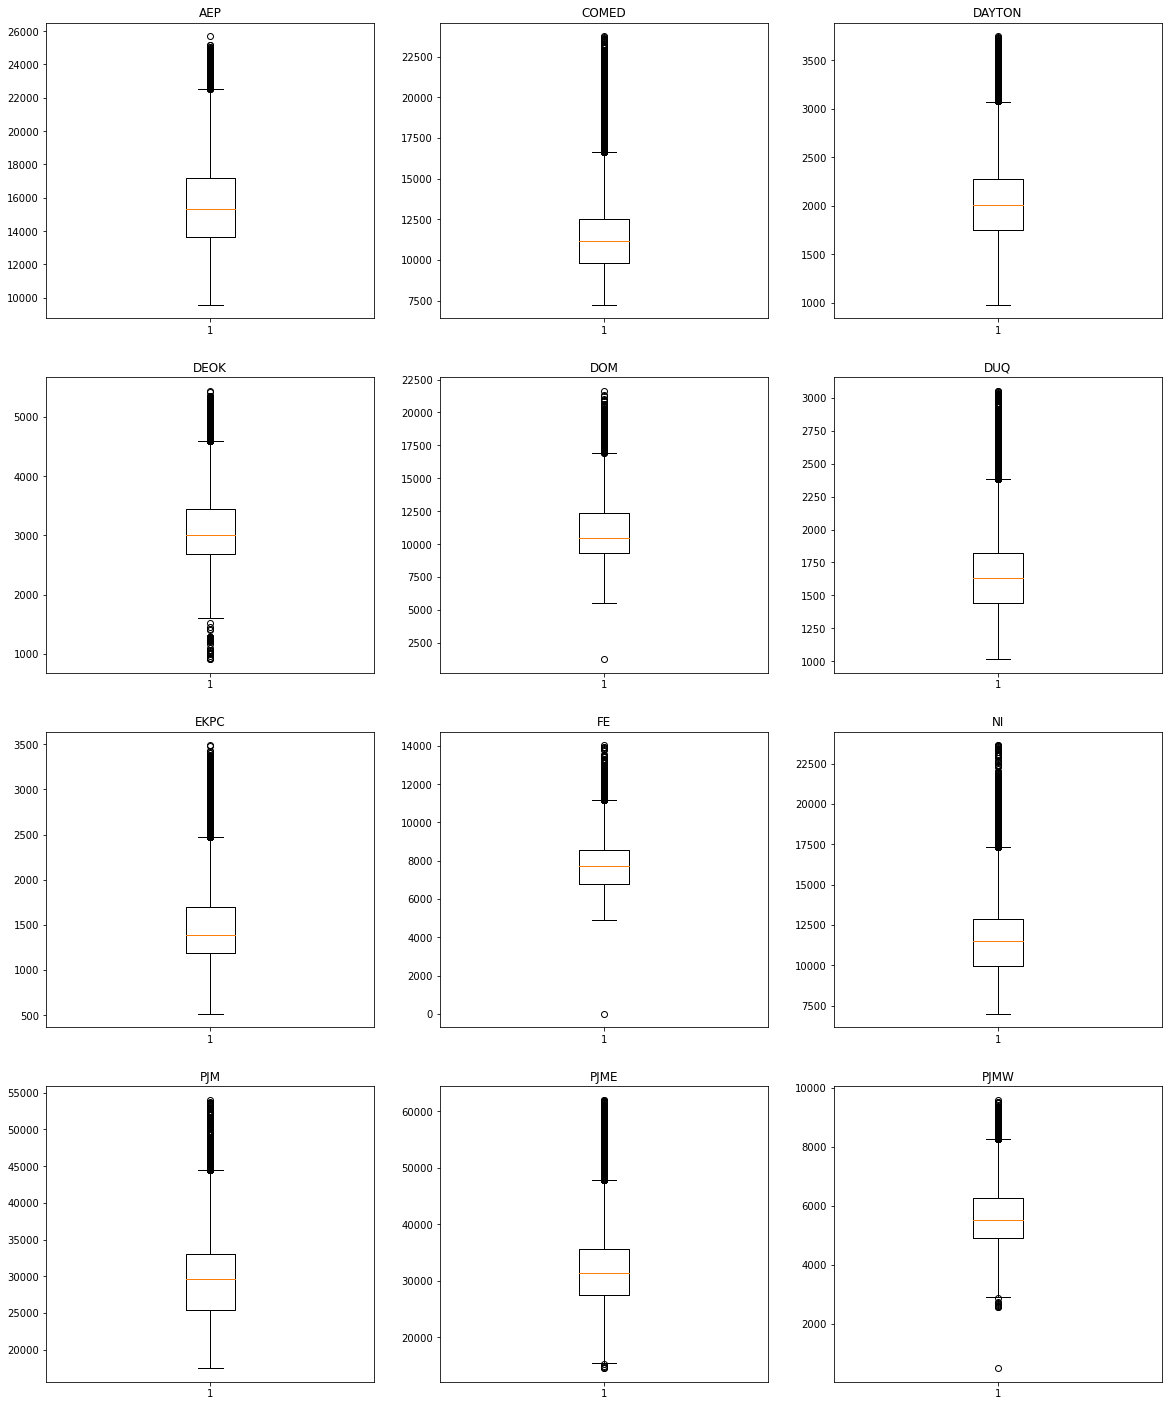

In [8]:
plt.figure(figsize=(20,25))
ax1 = plt.subplot(4, 3, 1);ax1.boxplot(aep['mw_energy_consumption']);ax1.title.set_text('AEP')
ax2 = plt.subplot(4, 3, 2);ax2.boxplot(comed['mw_energy_consumption']);ax2.title.set_text('COMED')
ax3 = plt.subplot(4, 3, 3);ax3.boxplot(dayton['mw_energy_consumption']);ax3.title.set_text('DAYTON')
ax4 = plt.subplot(4, 3, 4);ax4.boxplot(deok['mw_energy_consumption']);ax4.title.set_text('DEOK')
ax5 = plt.subplot(4, 3, 5);ax5.boxplot(dom['mw_energy_consumption']);ax5.title.set_text('DOM')
ax6 = plt.subplot(4, 3, 6);ax6.boxplot(duq['mw_energy_consumption']);ax6.title.set_text('DUQ')
ax7 = plt.subplot(4, 3, 7);ax7.boxplot(ekpc['mw_energy_consumption']);ax7.title.set_text('EKPC')
ax8 = plt.subplot(4, 3, 8);ax8.boxplot(fe['mw_energy_consumption']);ax8.title.set_text('FE')
ax9 = plt.subplot(4, 3, 9);ax9.boxplot(ni['mw_energy_consumption']);ax9.title.set_text('NI')
ax10 = plt.subplot(4, 3, 10);ax10.boxplot(pjm['mw_energy_consumption']);ax10.title.set_text('PJM')
ax11 = plt.subplot(4, 3, 11);ax11.boxplot(pjme['mw_energy_consumption']);ax11.title.set_text('PJME')
ax12 = plt.subplot(4, 3, 12);ax12.boxplot(pjmw['mw_energy_consumption']);ax12.title.set_text('PJMW')
plt.show()

Based on box plots in most of regions, outlier are visible, but since in almost all region the data records formed a continuse line we won't drop them except in *PJMW* , *FE* and *DOM*  whith one single record are far from main distribution of data.

In [9]:
#We remove outliers for these three electric region
remov1_inx = dom["mw_energy_consumption"].idxmin();dom = dom.drop(remov1_inx)
remov2_inx = fe["mw_energy_consumption"].idxmin();fe = fe.drop(remov2_inx)
remov3_inx = pjmw["mw_energy_consumption"].idxmin();pjmw = pjmw.drop(remov3_inx)


#### We use line plots to show how much electricity was consumed on hourly in each region during their  certain dates

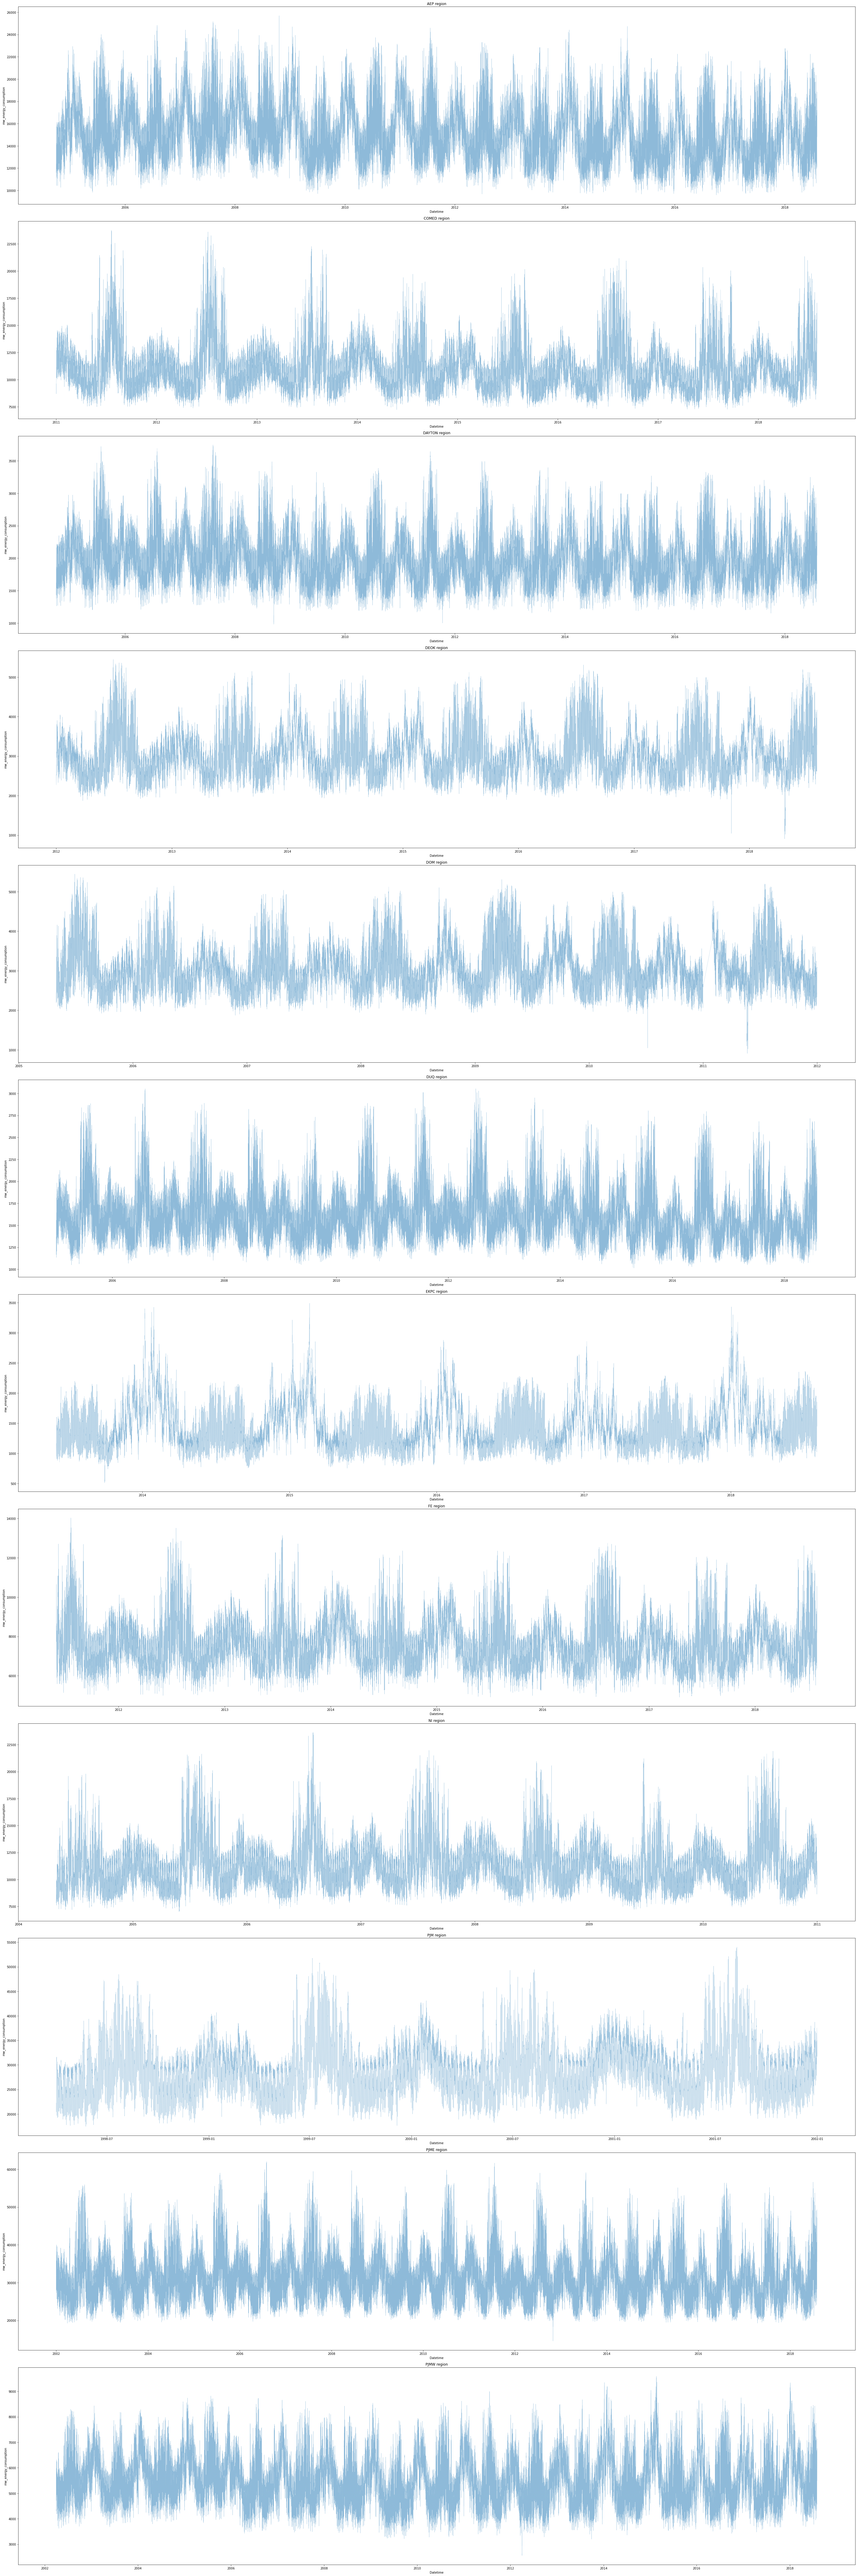

In [10]:
plt.figure(figsize=(40,120))
plt.subplot( 12, 1, 1)
ax1 = sns.lineplot(aep["Datetime"],aep["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax1.title.set_text('AEP region')
plt.subplot( 12, 1, 2)
ax2 = sns.lineplot(comed["Datetime"],comed["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax2.title.set_text('COMED region')
plt.subplot( 12, 1, 3)
ax3 = sns.lineplot(dayton["Datetime"],dayton["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax3.title.set_text('DAYTON region')
plt.subplot( 12, 1, 4)
ax4 = sns.lineplot(deok["Datetime"],deok["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax4.title.set_text('DEOK region')
plt.subplot( 12, 1, 5)
ax5 = sns.lineplot(dom["Datetime"],deok["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax5.title.set_text('DOM region')
plt.subplot( 12, 1, 6)
ax6 = sns.lineplot(duq["Datetime"],duq["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax6.title.set_text('DUQ region')
plt.subplot( 12, 1, 7)
ax7 = sns.lineplot(ekpc["Datetime"],ekpc["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax7.title.set_text('EKPC region')
plt.subplot( 12, 1, 8)
ax8 = sns.lineplot(fe["Datetime"],fe["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax8.title.set_text('FE region')
plt.subplot( 12, 1, 9)
ax9 = sns.lineplot(ni["Datetime"],ni["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax9.title.set_text('NI region')
plt.subplot( 12, 1, 10)
ax10 = sns.lineplot(pjm["Datetime"],pjm["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax10.title.set_text('PJM region')
plt.subplot( 12, 1, 11)
ax11 = sns.lineplot(pjme["Datetime"],pjme["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax11.title.set_text('PJME region')
plt.subplot( 12, 1, 12)
ax12 = sns.lineplot(pjmw["Datetime"],pjmw["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax12.title.set_text('PJMW region')
plt.tight_layout() 

plt.show()

In [11]:
# We concatenate all the datasets together
df_raw = pd.concat( [aep, comed, dayton, deok, dom, duq, ekpc, fe, ni, pjm, pjme, pjmw])
df_raw = df_raw.reset_index().drop(['index'],axis= 1)
df_raw.sample(5) # check

Datetime  mw_energy_consumption electric_region
148090 2014-12-10 20:00:00                13751.0           COMED
702402 2017-04-22 10:00:00                 6701.0              FE
333647 2014-03-12 19:00:00                 3523.0            DEOK
137150 2012-03-10 22:00:00                10412.0           COMED
395269 2008-06-02 20:00:00                12334.0             DOM

In [12]:
print(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090124 entries, 0 to 1090123
Data columns (total 3 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Datetime               1090124 non-null  datetime64[ns]
 1   mw_energy_consumption  1090124 non-null  float64       
 2   electric_region        1090124 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.0+ MB
None


#### Next, we will describe the data. At the beginning of each step, we copy the dataset to make it easier to reload the data in case of problems in the project.

In [13]:
df1 = df_raw.copy()

<AxesSubplot:xlabel='mw_energy_consumption', ylabel='electric_region'>

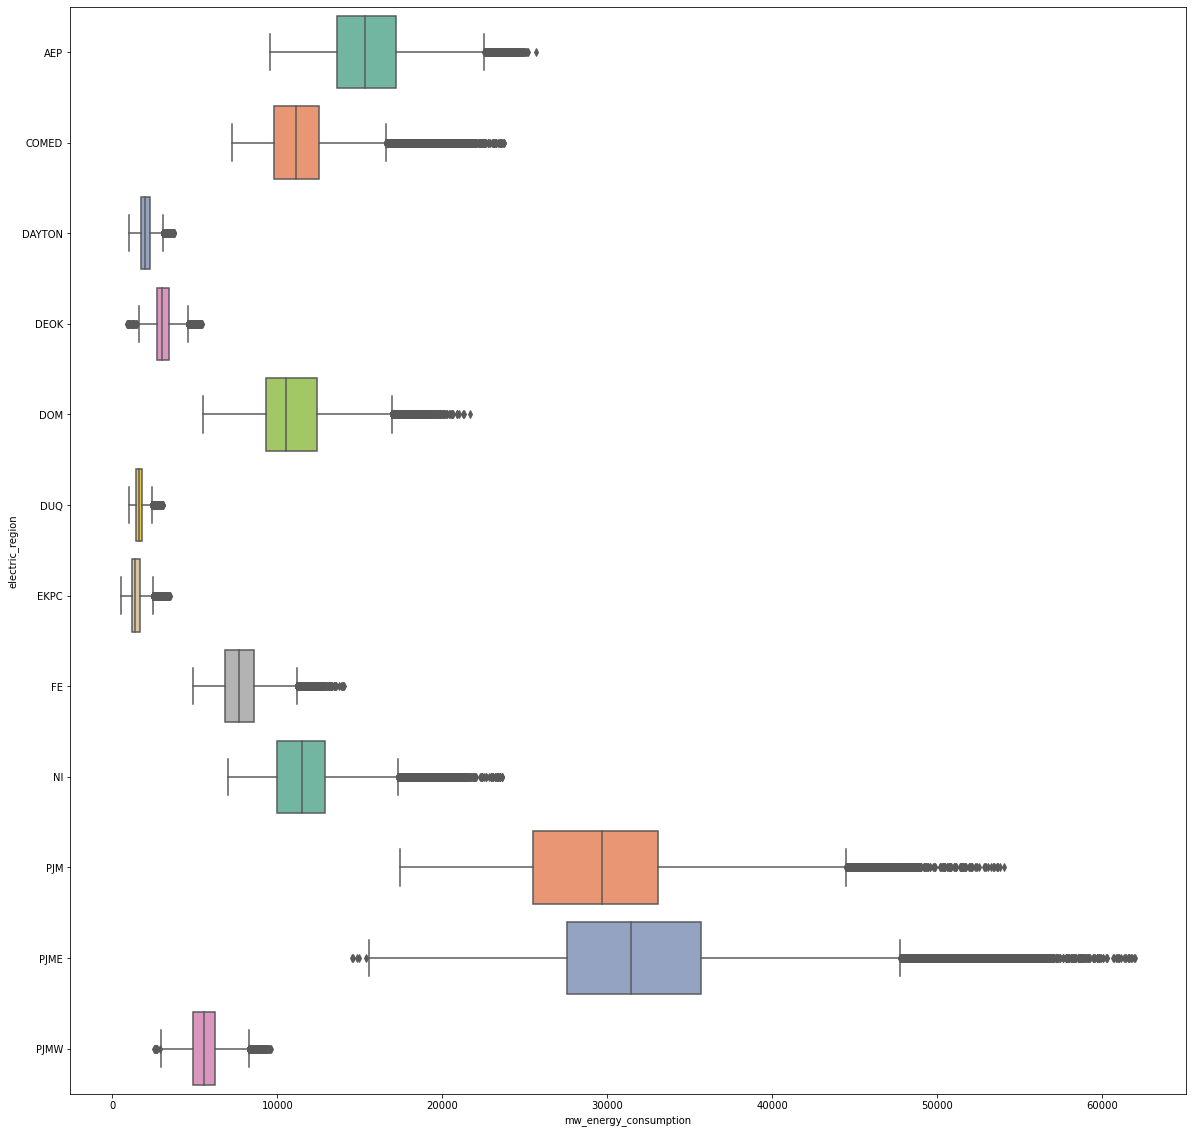

In [14]:
# We use boxplot to show the megawatt energy consumption by regions.
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot( y= 'electric_region', x='mw_energy_consumption' , data=df1 ,palette="Set2")

# DESCRIPTION OF DATA

### Check NA

In [15]:
df1.isna().sum()

Datetime                 0
mw_energy_consumption    0
electric_region          0
dtype: int64

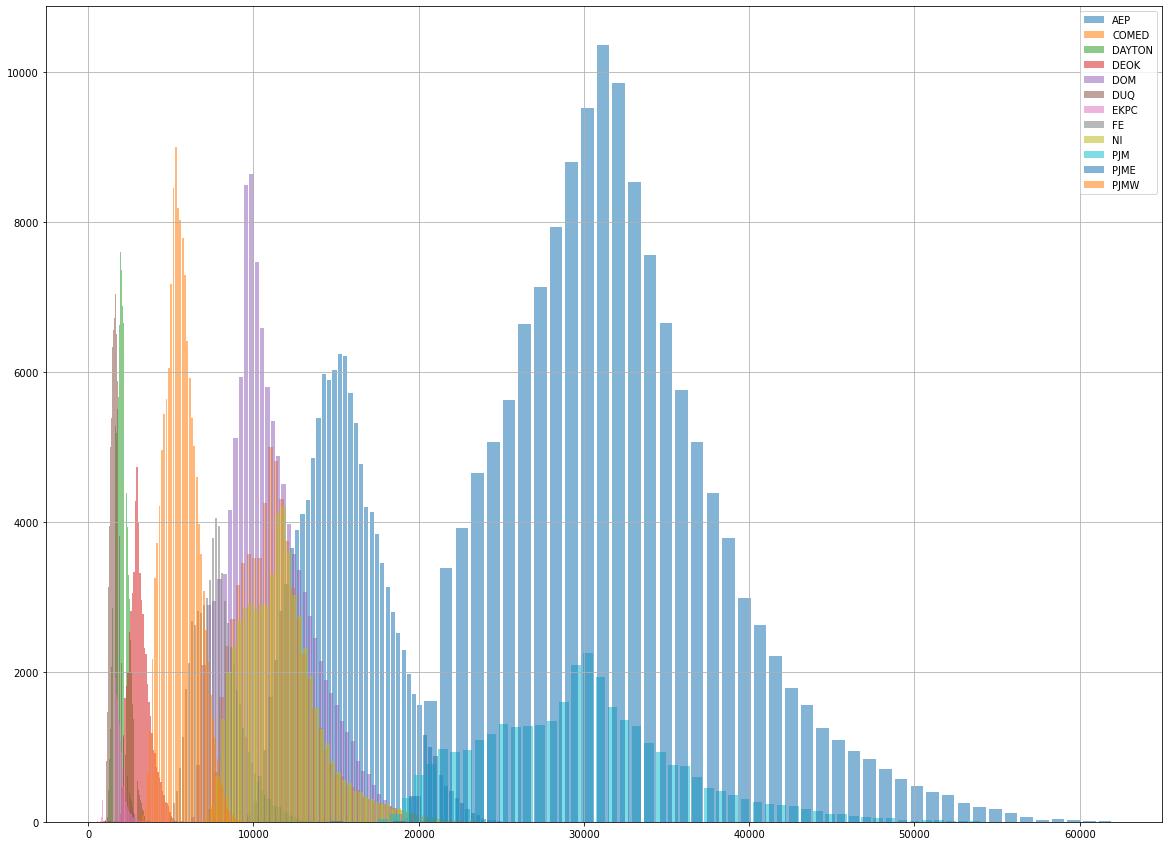

In [16]:
# We use histogram to show the megawatt energy consumption for respective region
lab = df1['electric_region'].unique()
df1.groupby(['electric_region'])['mw_energy_consumption'].hist(bins=50, figsize=(20,15),alpha = 0.55,rwidth = .8)
plt.legend(lab)
plt.show()

<AxesSubplot:xlabel='mw_energy_consumption', ylabel='Density'>

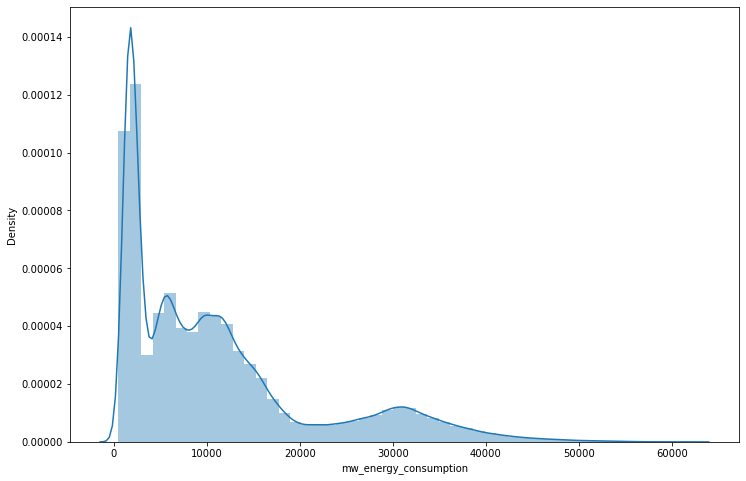

In [17]:
# We use histogram to show the megawatt energy consumption for all regions
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot( df1['mw_energy_consumption'], hist=True )

In [18]:
# Discreption for Number of observations, min, max, mean, variance, skewness and kurtosis
desc = pd.DataFrame(sc.stats.describe(df1['mw_energy_consumption'].to_numpy())).T
desc.columns=['Number of observations','Min & Max', 'mean', 'variance','skewness','kurtosis']
desc

Number of observations         Min & Max          mean          variance  \
0                1090124  (514.0, 62009.0)  11209.790699  110975480.003823   

   skewness  kurtosis  
0  1.356395  1.198169

Positive Skewness means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.


(Kurtosis < 3):the kurtosis is less than 3, then the dataset has lighter tails than a normal distribution.


In [19]:
# # We use histogram to show the log megawatt energy consumption for respective region
# df_log = df1.copy()
# df_log['mw_energy_consumption'] = df_log.groupby('electric_region')['mw_energy_consumption'].transform(lambda x: np.log(x))
# df_log.groupby(['electric_region'])['mw_energy_consumption'].hist(bins=50, figsize=(20,15),alpha = 0.55)
# plt.legend(lab)
# plt.show()

# FEATURE ENGINEERING


#### We want to have a view of the evolution of energy consumption by looking only at the day of week,  month, year, day sessions, workdays and season as information.

In this function at the beginging, DateTime column change to date-time series.

So we create a function to generate these features:

  dow(day of week):
 

     0 - Monday
     1 - Tuesday
     2 - Wednesday
     3 - Thursday
     4 - Friday
     5 - Saturday
     6 - Sunday 

##### 
Day session:

    0am to 6 am :Night
    6am to 12 pm: Morning
    12pm to 18pm : Afternoon 
    18pm to 24pm :Evening


Season:

    # - Winter -> December (12), January (01) and February (02);
    # - Spring -> March (03), April (04) and May (05);
    # - Summer -> Jun (06), July (07) and August (08);
    # - Autumn -> September (09), October (10) and November (11).

In [20]:
def data_prep(im_file):
     
    im_file['dow'] = im_file['Datetime'].dt.dayofweek
    im_file['month'] = im_file['Datetime'].dt.month
    im_file['year'] = im_file['Datetime'].dt.year
    im_file['Day_session']=pd.cut(im_file.Datetime.dt.hour,
               [0,6,12,18,23],
               labels=['Night','Morning','Afternoon','Evening'],
               include_lowest=True)
    im_file['Workdays']=pd.cut(im_file.Datetime.dt.dayofweek,
               [0,4,6],
               labels=['workday','weekend'],
               include_lowest=True)
    
    im_file['Season'] = im_file['Datetime'].apply( lambda x: 'Winter' if x.month == 12 or x.month == 1 or x.month == 2 else 'Spring' if  x.month == 3 or x.month == 4 or x.month == 5 else 'Summer' if  x.month == 6 or x.month == 7 or x.month == 8 else 'Autumn' if  x.month == 9 or x.month == 10 or x.month == 11 else '')
    return im_file

In [21]:
df2 = data_prep(df1)

In [22]:
df2_1 = df2.sort_values('Datetime',ascending=True).groupby('electric_region').head(len(df2))

In [23]:
df2_1 = df2_1.reset_index(drop=True)
df2_1.head(5)

Datetime  mw_energy_consumption electric_region  dow  month  \
0 1998-04-01 01:00:00                22259.0             PJM    2      4   
1 1998-04-01 02:00:00                21244.0             PJM    2      4   
2 1998-04-01 03:00:00                20651.0             PJM    2      4   
3 1998-04-01 04:00:00                20421.0             PJM    2      4   
4 1998-04-01 05:00:00                20713.0             PJM    2      4   

   year Day_session Workdays  Season  
0  1998       Night  workday  Spring  
1  1998       Night  workday  Spring  
2  1998       Night  workday  Spring  
3  1998       Night  workday  Spring  
4  1998       Night  workday  Spring

In [24]:
df4 = df2_1.copy()

#### In below cell, data after preprocessing are visualized based on the generated features, and counts(and density).

<AxesSubplot:xlabel='mw_energy_consumption', ylabel='Density'>

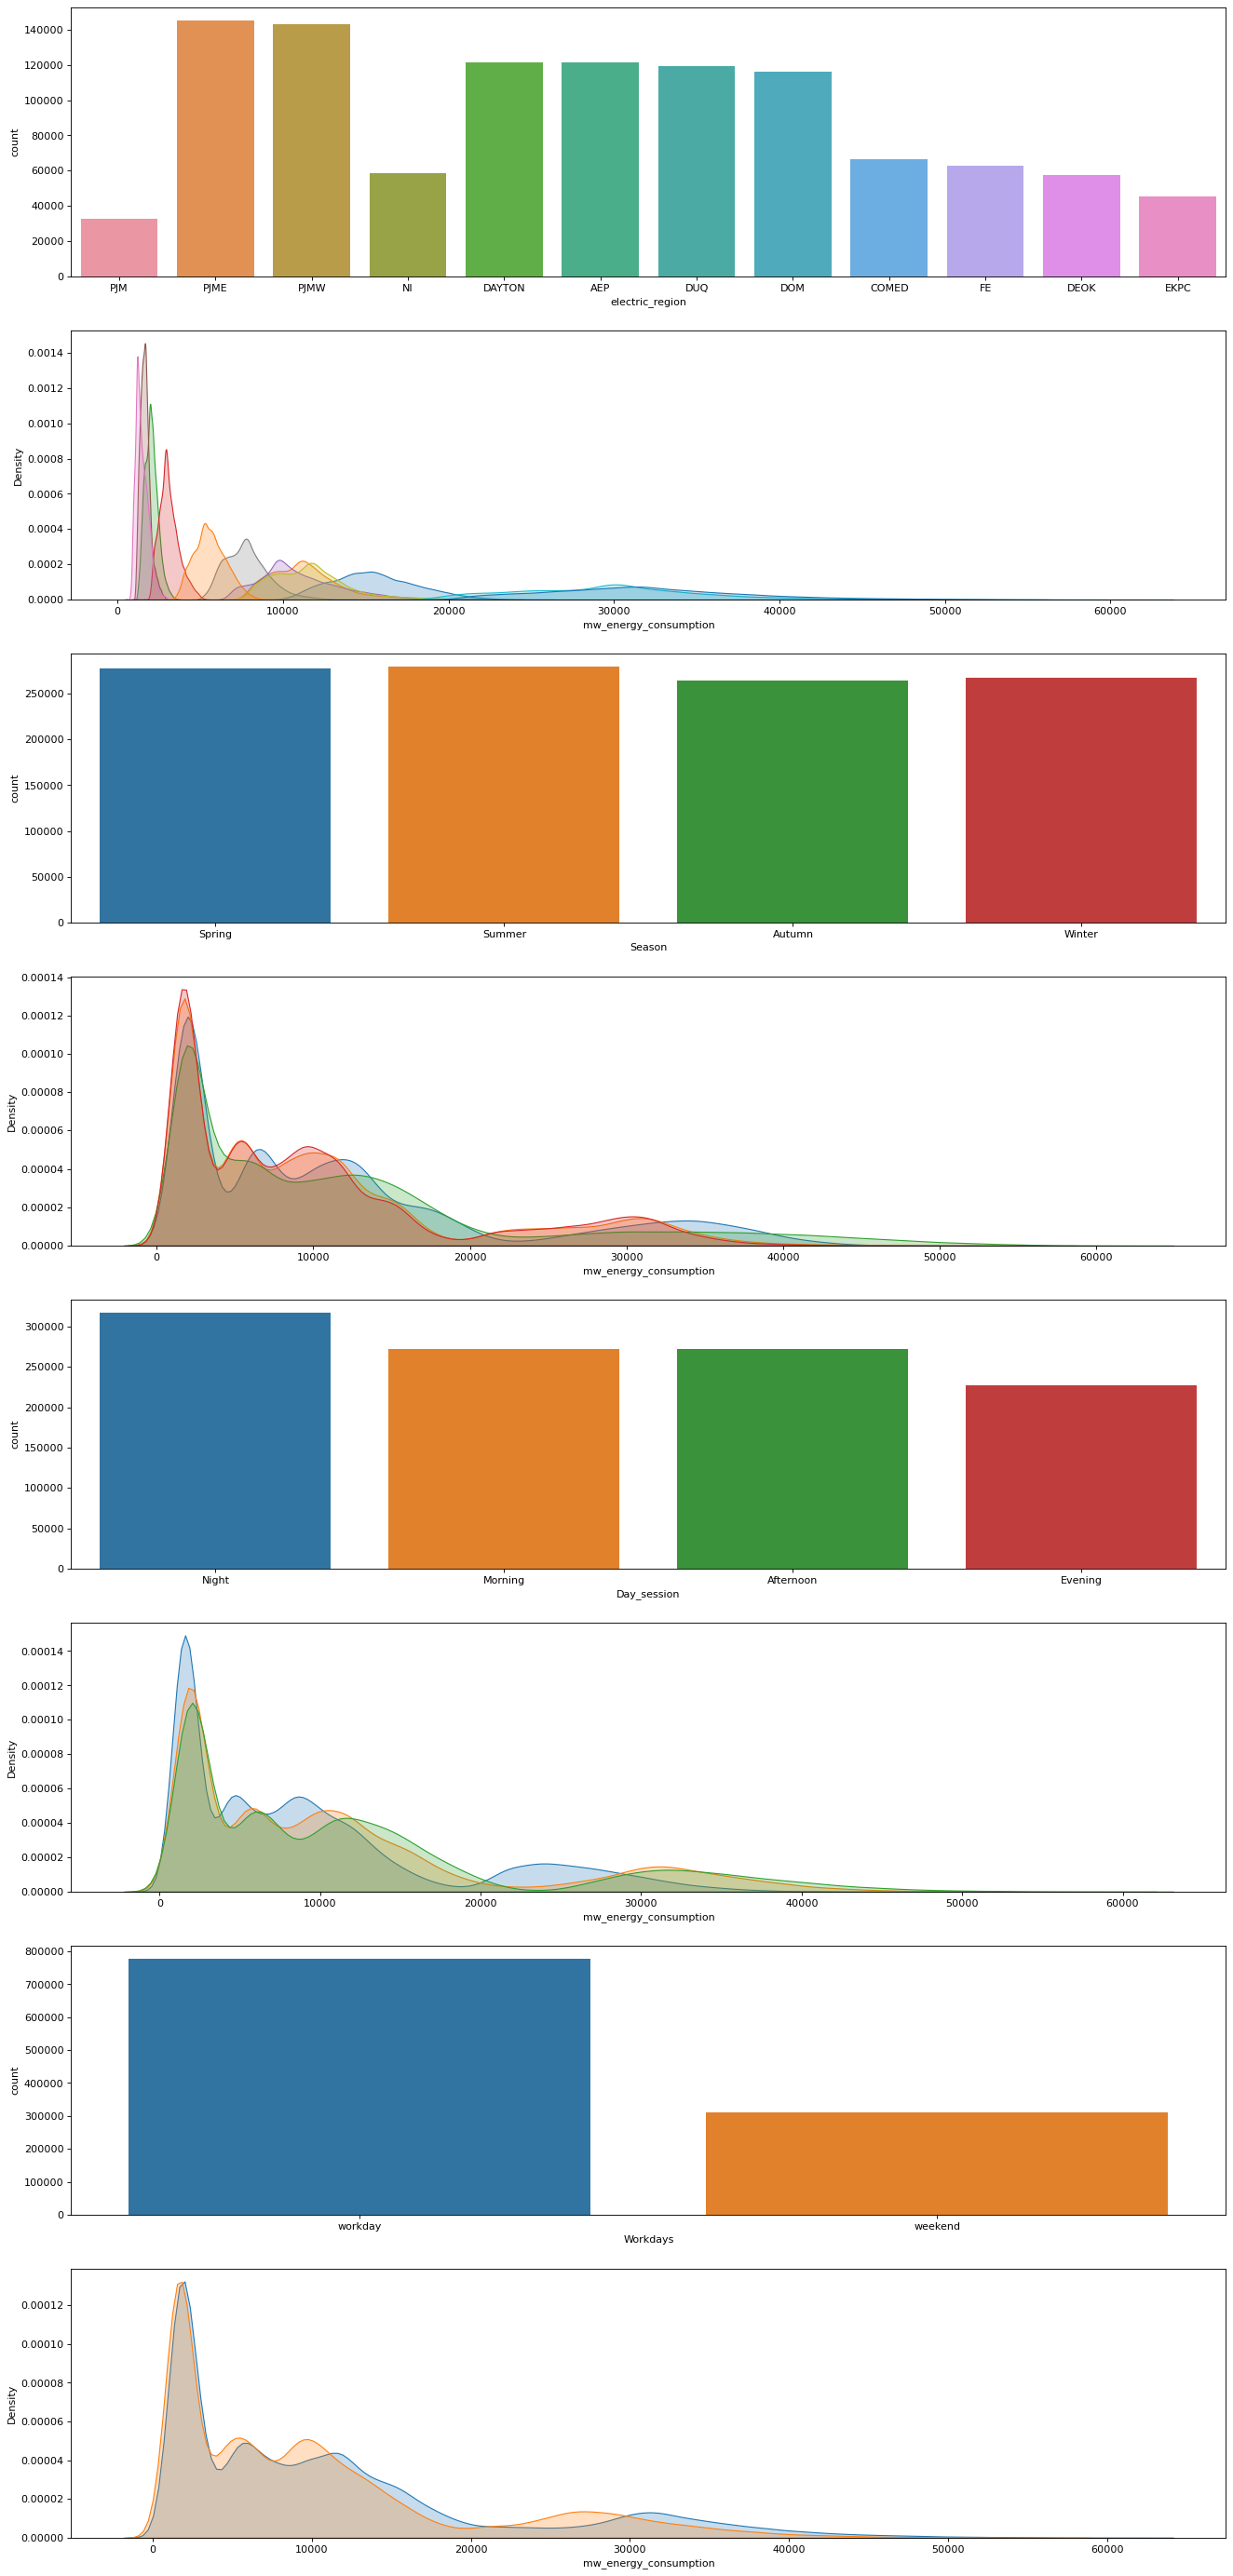

In [25]:
plt.figure(figsize=(20, 45), dpi=80)

# electric region 
plt.subplot( 8, 1, 1)
sns.countplot( df4['electric_region'] )

plt.subplot( 8, 1, 2)
sns.kdeplot( df4[df4['electric_region'] == 'AEP']['mw_energy_consumption'], label='AEP', shade=True )
sns.kdeplot( df4[df4['electric_region'] == 'COMED']['mw_energy_consumption'], label='COMED', shade=True )
sns.kdeplot( df4[df4['electric_region'] == 'DAYTON']['mw_energy_consumption'], label='DAYTON', shade=True )
sns.kdeplot( df4[df4['electric_region'] == 'DEOK']['mw_energy_consumption'], label='DEOK', shade=True )
sns.kdeplot( df4[df4['electric_region'] == 'DOM']['mw_energy_consumption'], label='DOM', shade=True )
sns.kdeplot( df4[df4['electric_region'] == 'DUQ']['mw_energy_consumption'], label='DUQ', shade=True )
sns.kdeplot( df4[df4['electric_region'] == 'EKPC']['mw_energy_consumption'], label='EKPC', shade=True )
sns.kdeplot( df4[df4['electric_region'] == 'FE']['mw_energy_consumption'], label='FE', shade=True )
sns.kdeplot( df4[df4['electric_region'] == 'NI']['mw_energy_consumption'], label='NI', shade=True )
sns.kdeplot( df4[df4['electric_region'] == 'PJM']['mw_energy_consumption'], label='PJM', shade=True )
sns.kdeplot( df4[df4['electric_region'] == 'PJME']['mw_energy_consumption'], label='PJME', shade=True )
sns.kdeplot( df4[df4['electric_region'] == 'PJMW']['mw_energy_consumption'], label='PJMW', shade=True )

# # season
plt.subplot( 8, 1, 3)
sns.countplot( df4['Season'] )

plt.subplot( 8, 1, 4)
sns.kdeplot( df4[df4['Season'] == 'Winter']['mw_energy_consumption'], label='Winter', shade=True )
sns.kdeplot( df4[df4['Season'] == 'Autumn']['mw_energy_consumption'], label='Autumn', shade=True )
sns.kdeplot( df4[df4['Season'] == 'Summer']['mw_energy_consumption'], label='Summer', shade=True )
sns.kdeplot( df4[df4['Season'] == 'Spring']['mw_energy_consumption'], label='Spring', shade=True )

# # Day session
plt.subplot( 8, 1, 5)
sns.countplot( df4['Day_session'] )

plt.subplot( 8, 1, 6)
sns.kdeplot( df4[df4['Day_session'] == 'Night']['mw_energy_consumption'], label='Night', shade=True )
sns.kdeplot( df4[df4['Day_session'] == 'Morning']['mw_energy_consumption'], label='Morning', shade=True )
sns.kdeplot( df4[df4['Day_session'] == 'Noon']['mw_energy_consumption'], label='Noon', shade=True )
sns.kdeplot( df4[df4['Day_session'] == 'Evening']['mw_energy_consumption'], label='Evening', shade=True )

# # # workdays
plt.subplot( 8, 1, 7)
sns.countplot( df4['Workdays'] )

plt.subplot( 8, 1, 8)
sns.kdeplot( df4[df4['Workdays'] == 'workday']['mw_energy_consumption'], label='workday', shade=True )
sns.kdeplot( df4[df4['Workdays'] == 'weekend']['mw_energy_consumption'], label='weekend', shade=True )




#### In this cell, since we use  categorical variable we assign a number to them in order to plot them.

In [26]:

com_num = { 'AEP': 1, 'COMED': 2, 'DAYTON': 3, 'DEOK': 4, 'DOM': 5, 'DUQ': 6, 'EKPC': 7, 'FE': 8, 'NI': 9, 'PJM': 10, 'PJME': 11, 'PJMW': 12 }
df4['electric_region'] = df4['electric_region'].map( com_num )
wed_num= { 'weekend': 1, 'workday': 2}
df4['Workdays']= df4['Workdays'].map( wed_num )
se_num= { 'Spring': 1, 'Summer': 2,'Autumn': 3,'Winter': 4}
df4['Season']= df4['Season'].map( se_num )


### Which region spend more energy
In region 'PJM': 10 and 'PJME': 11 consumed much more energy than others.
Regplot tries to plot the data and a linear regression model fit.

<AxesSubplot:xlabel='electric_region', ylabel='mw_energy_consumption'>

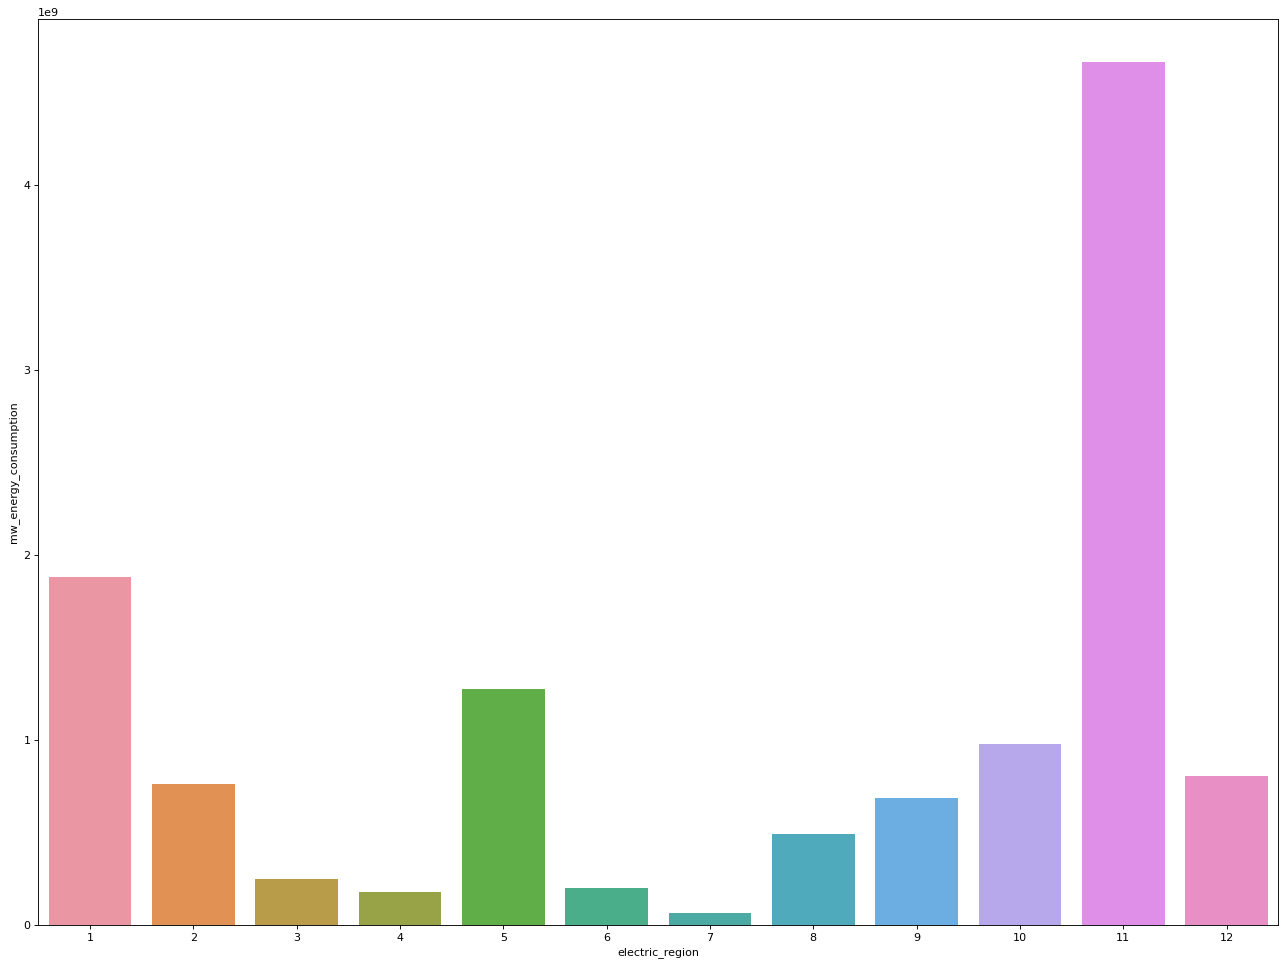

In [27]:
plt.figure(figsize=(20, 15), dpi=80)

aux1 = df4[['electric_region', 'mw_energy_consumption']].groupby( 'electric_region' ).sum().reset_index()

sns.barplot( x='electric_region', y='mw_energy_consumption', data=aux1)


### Yearly consume energy
From 1997 to 2018, more electricity was used in the first 4 years, and then gradually decreased

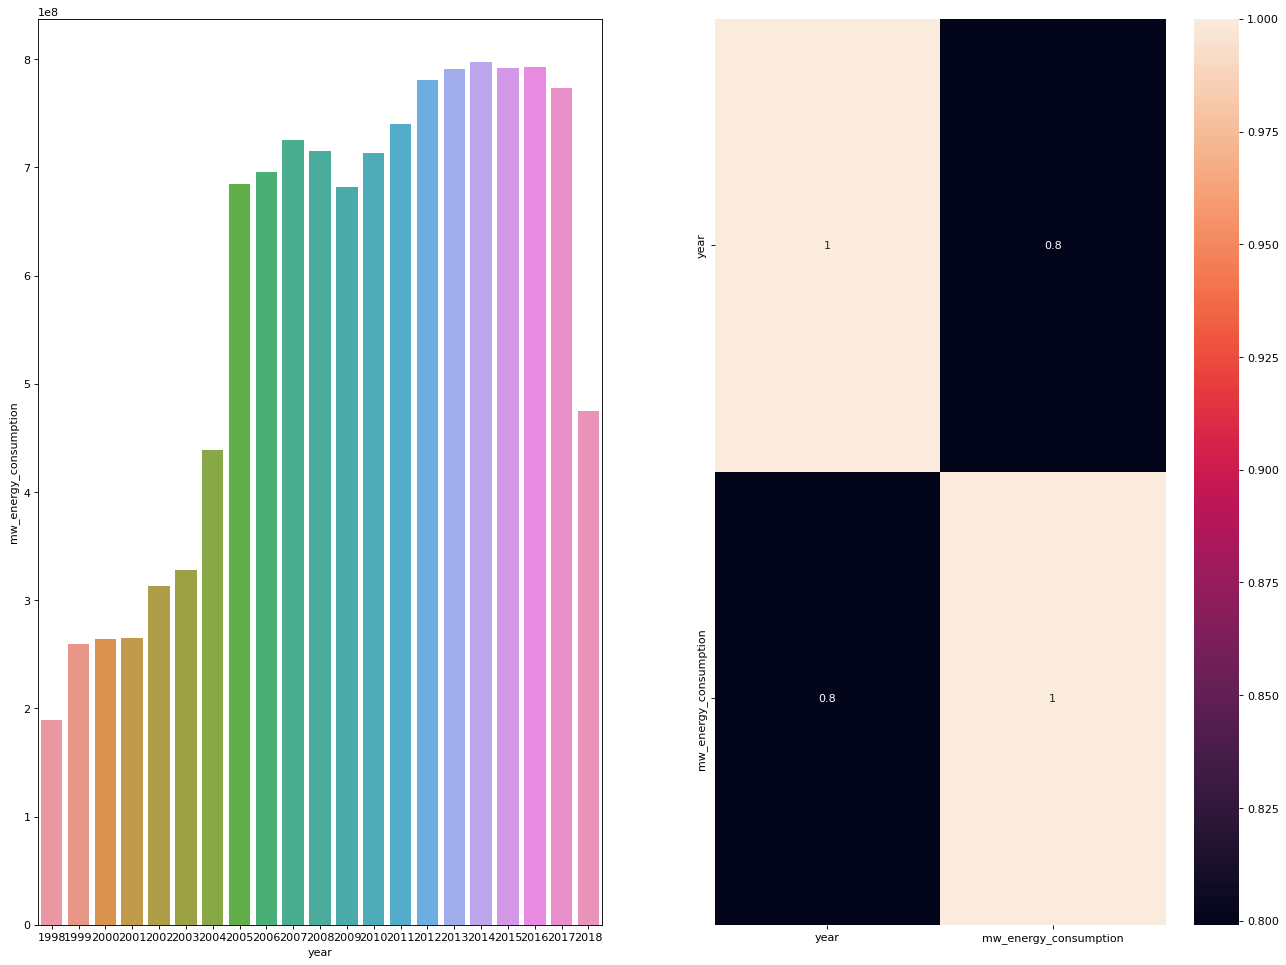

In [28]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(1,2,1)
aux1 = df4[['year', 'mw_energy_consumption']].groupby( 'year' ).sum().reset_index()
sns.barplot( x='year', y='mw_energy_consumption', data=aux1)
# part of day should be number not str
plt.subplot(1,2,2)
aux3 = df4[['year', 'mw_energy_consumption']].groupby( 'year' ).sum().reset_index()
sns.heatmap( aux3.corr( method='pearson' ), annot=True );

### Higher or lower temperature seasons consume more energy

TRUE When we see the sum of all energy consumption, we see that winter and summer are the most intense seasons, recording the highest energy consumption. At the same time, when we have dispersed over the years, we observe the same behavior, with few exceptions.

<AxesSubplot:>

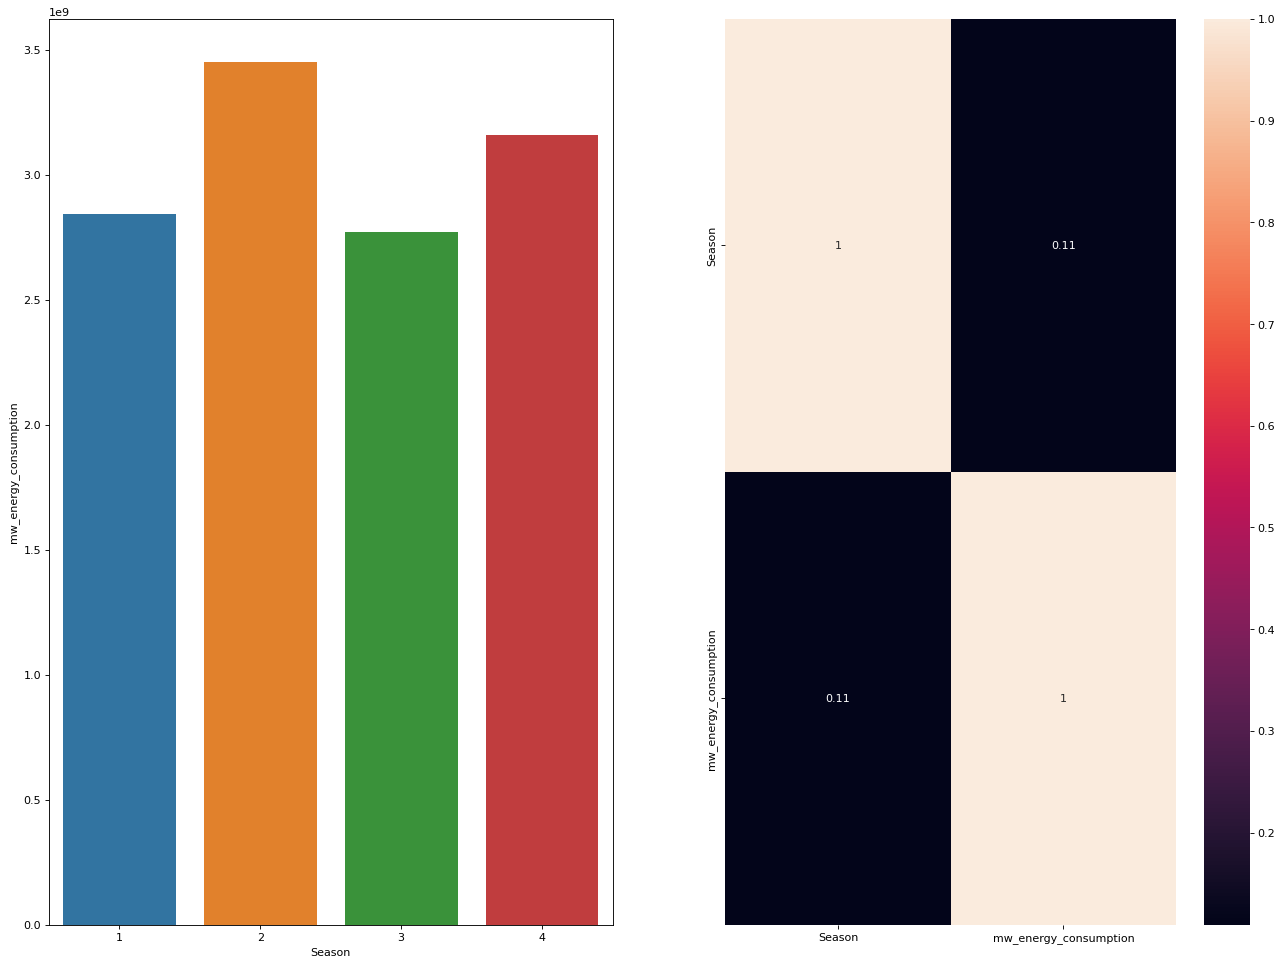

In [29]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(1,2,1)
aux1 = df4[['Season', 'mw_energy_consumption']].groupby( 'Season' ).sum().reset_index()
sns.barplot( x='Season', y='mw_energy_consumption', data=aux1)
# part of day should be number not str

plt.subplot(1,2,2)
aux2 = df4[['Season', 'mw_energy_consumption']].groupby( 'Season' ).sum().reset_index()
sns.heatmap( aux2.corr( method='pearson' ), annot=True )


### Consume more energy during weekends

FALSE Less energy is consumed during the weekend.

<AxesSubplot:>

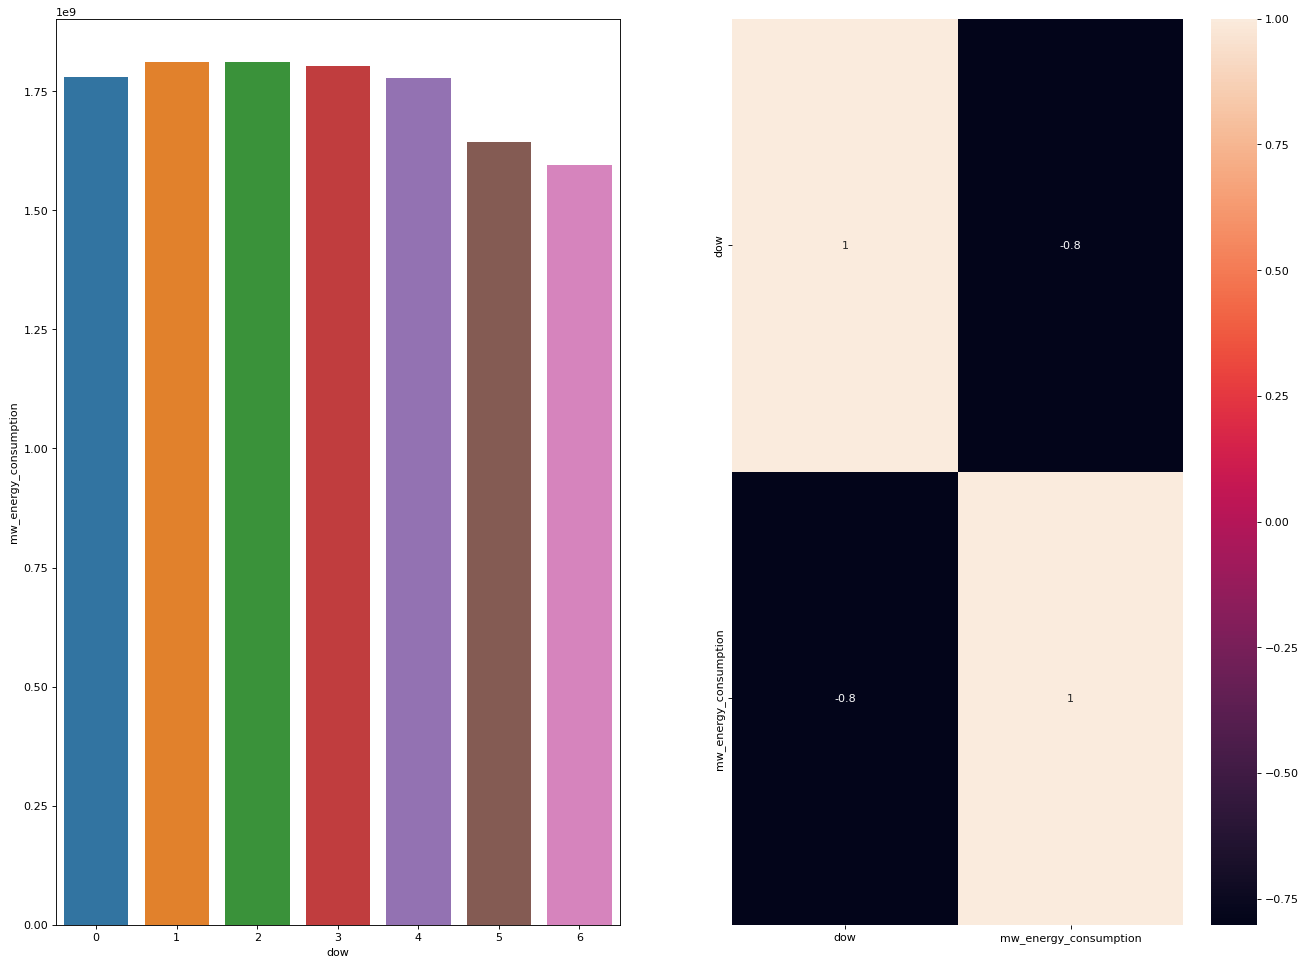

In [30]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(1,2,1)
aux1 = df4[['dow', 'mw_energy_consumption']].groupby( 'dow' ).sum().reset_index()

sns.barplot( x='dow', y='mw_energy_consumption', data=aux1)
# part of day should be number not str

plt.subplot(1,2,2)
aux3 = df4[['dow', 'mw_energy_consumption']].groupby( 'dow' ).sum().reset_index()
sns.heatmap( aux3.corr( method='pearson' ), annot=True )

### Workday consume more energy

TRUE workdays consume more energy than weekends

<AxesSubplot:xlabel='Workdays', ylabel='mw_energy_consumption'>

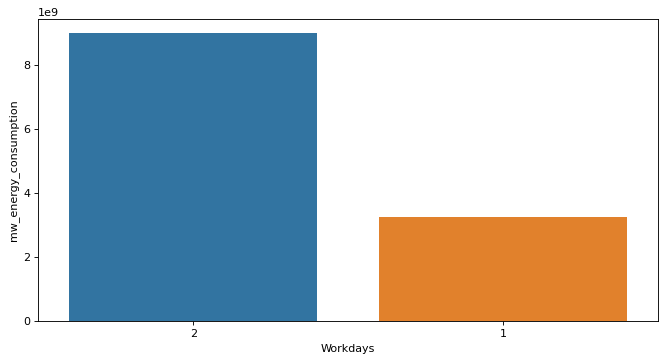

In [31]:
plt.figure(figsize=(10, 5), dpi=80)

aux1 = df4[['Workdays', 'mw_energy_consumption']].groupby( 'Workdays' ).sum().reset_index()
sns.barplot( x='Workdays', y='mw_energy_consumption', data=aux1)
# part of day should be number not str2

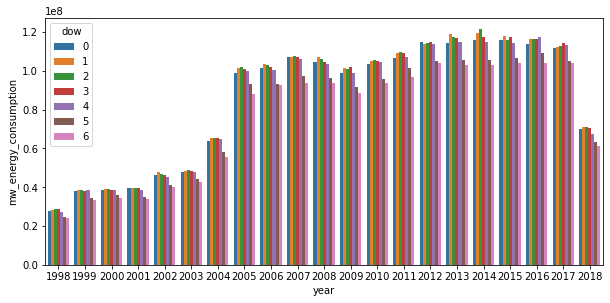

In [32]:
plt.figure(figsize=(10,10))
aux2 = df4[['year', 'dow', 'mw_energy_consumption']].groupby( ['year', 'dow'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='year', y='mw_energy_consumption', hue='dow', data=aux2 )
plt.show()

#### We use a heatmap to show the relevance for all our features with our label magewatt energy consumption.

<AxesSubplot:>

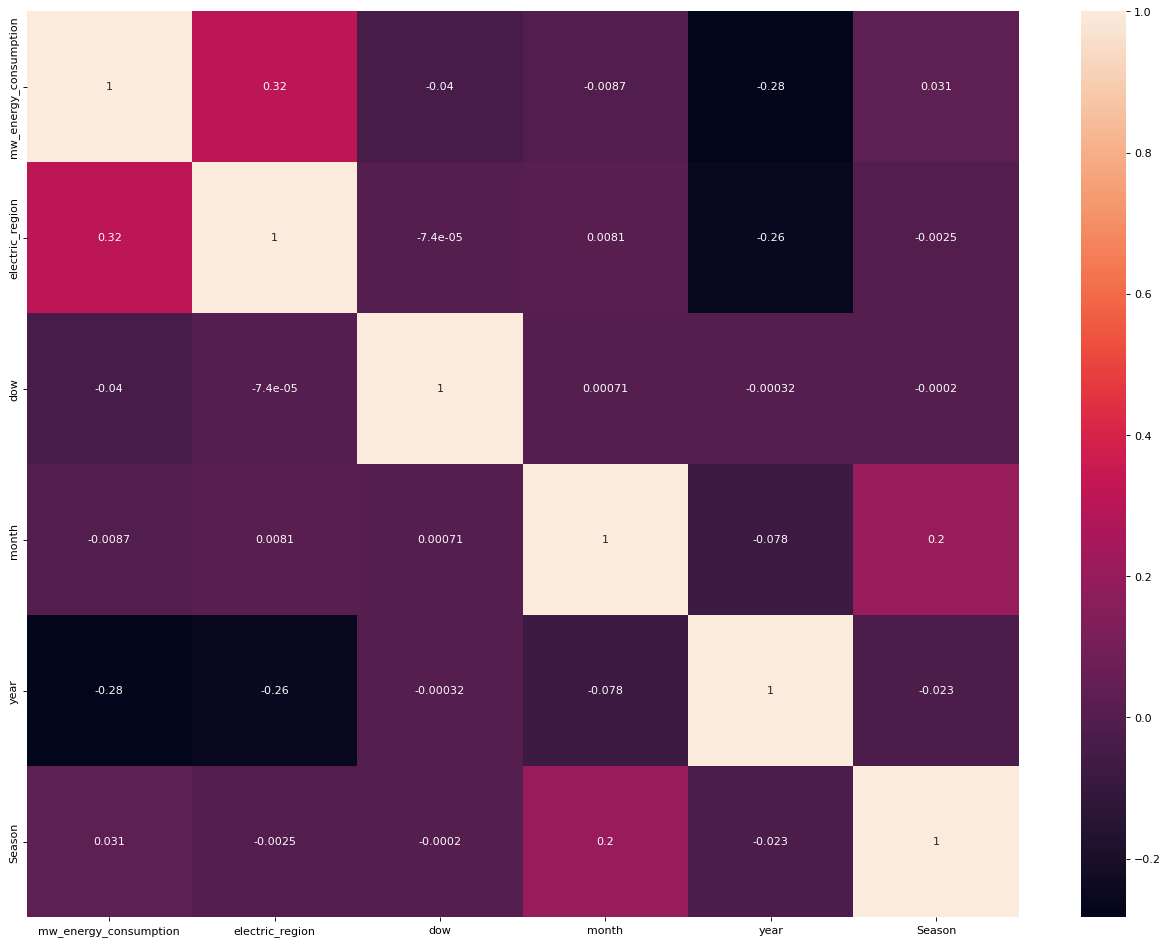

In [33]:
correlation = df4.corr( method='pearson' )
plt.figure(figsize=(20, 15), dpi=80)
sns.heatmap( correlation, annot=True )

In [34]:
df5=df2_1.copy()
df6=df2_1.copy()
df7 = df2_1.copy()

In [35]:
df6

Datetime  mw_energy_consumption electric_region  dow  \
0       1998-04-01 01:00:00                22259.0             PJM    2   
1       1998-04-01 02:00:00                21244.0             PJM    2   
2       1998-04-01 03:00:00                20651.0             PJM    2   
3       1998-04-01 04:00:00                20421.0             PJM    2   
4       1998-04-01 05:00:00                20713.0             PJM    2   
...                     ...                    ...             ...  ...   
1090119 2018-08-03 00:00:00                 3281.0            DEOK    4   
1090120 2018-08-03 00:00:00                 1448.0            EKPC    4   
1090121 2018-08-03 00:00:00                14809.0             AEP    4   
1090122 2018-08-03 00:00:00                35486.0            PJME    4   
1090123 2018-08-03 00:00:00                 5489.0            PJMW    4   

         month  year Day_session Workdays  Season  
0            4  1998       Night  workday  Spring  
1            4  1998       Night  workday  Spring  
2            4  1998       Night  workday  Spring  
3            4  1998       Night  workday  Spring  
4            4  1998       Night  workday  Spring  
...        ...   ...         ...      ...     ...  
1090119      8  2018       Night  workday  Summer  
1090120      8  2018       Night  workday  Summer  
1090121      8  2018       Night  workday  Summer  
1090122      8  2018       Night  workday  Summer  
1090123      8  2018       Night  workday  Summer  

[1090124 rows x 9 columns]

# DATA PREPARATION & FEATURE SELECTIONs

### Splitting, scaling and encoding the data frame

First we split our data to train and test sets with desired ratio, then sacle numerical values ( eneregy consumtion  & year) for desired region.

In [36]:
# Split dataframe into training and test dataset
def split_and_scaling(df,fraction=0.8):

    X_train, X_test = pd.DataFrame([]), pd.DataFrame([])
    col_to_scaling=['mw_energy_consumption','year']
    scaler=MinMaxScaler()  # converting the value of the range to 0 to 1

    for name in df['electric_region'].unique():
        co_name= df.loc[df['electric_region']== name]
        a=int(len(co_name)*fraction)
        train=co_name.iloc[:a]
        test= co_name.iloc[a:]
        
        X_train = X_train.append(train)
        X_test = X_test.append(test)
        
    scaler=MinMaxScaler() # converting the value of the range to 0 to 1
    X_train[col_to_scaling]=scaler.fit_transform(X_train[col_to_scaling])
    X_test[col_to_scaling]=scaler.transform(X_test[col_to_scaling])
       
    return X_train,X_test

Following fuction preform encoding on categorical data with **pandas.get_dummies** built-in function and in next step we drop main features.

In [37]:
def dummies_split(df,region_name,fraction=.8):
        X_train,X_test= split_and_scaling(df,fraction)
        X_train1= pd.get_dummies(data=X_train,columns=['Day_session','Season','dow','Workdays','month']).loc[X_train['electric_region']==region_name]
        X_train1=X_train1.drop(['Datetime','mw_energy_consumption'],axis='columns')
        X_train2=X_train1
        y_train1=X_train['mw_energy_consumption'].loc[X_train['electric_region']==region_name]
        y_train2=pd.DataFrame(y_train1)
        X_test1= pd.get_dummies(data=X_test,columns=['Day_session','Season','dow','Workdays','month']).loc[X_test['electric_region']==region_name]
        X_test1=X_test1.drop(['Datetime','mw_energy_consumption'],axis='columns')
        X_test2=X_test1
        y_test1=X_test['mw_energy_consumption'].loc[X_test['electric_region']==region_name]
        y_test2=pd.DataFrame(y_test1)


        return X_train2,X_test2,y_train2,y_test2

This fucntion will does invers scaling on predicted data after ML model.


In [38]:
def inver_sc(df,y):
    mnn = df['mw_energy_consumption'].min()
    mxx = df['mw_energy_consumption'].max()
    y = np.asarray(y)
    inv_y = y *(mxx-mnn)+ mnn
    return inv_y

# MACHINE LEARNING MODELLING --- ANN ML

In [39]:
def ml_model(region_name,fraction = 0.8, h_layer_sizes = (15,15,15),
             act_fun ='tanh',sol_fun = 'adam',A_pa=0.01,Cross_val =0.2):
    
   
    X_train,X_test,y_train,y_test=dummies_split(df6,region_name,fraction)
    X_train=X_train.drop(['electric_region'],axis='columns')
    X_test=X_test.drop(['electric_region'],axis='columns')
    
    mlp_model= MLPRegressor(hidden_layer_sizes = h_layer_sizes, random_state = 1234, activation=act_fun,
                 solver=sol_fun,alpha= A_pa,max_iter=100,learning_rate= 'adaptive',
                 verbose = False,tol =1e-6, early_stopping =True,validation_fraction=Cross_val,
                 warm_start = False)
    
    
    mlp_model.fit(X_train.to_numpy(), y_train.to_numpy())
    print('The train score of model for {company} is {score} '.format(company=region_name,score=mlp_model.score(X_train,y_train)))
    print('The test score of model for {company} is {score} '.format(company=region_name,score=mlp_model.score(X_test,y_test)))


    
    y_train_predict = mlp_model.predict(X_train.to_numpy())
    y_test_predict = mlp_model.predict(X_test.to_numpy())

    print('RMSE for train data for is:',mean_squared_error(y_train, y_train_predict,squared=False),
        'and  RMSE for test data is:',(mean_squared_error(y_test, y_test_predict,squared=False)))

    print('MAPE for train data is:',mean_absolute_percentage_error(y_train, y_train_predict),
        'and MAPE for test data is:',(mean_absolute_percentage_error(y_test, y_test_predict)))


    y_test_predict_uns = inver_sc(df7,y_test_predict)
    y_train_predict_uns = inver_sc(df7,y_train_predict)
    y_train_uns = inver_sc(df7,y_train)
    y_test_uns = inver_sc(df7,y_test)
    
    plt.figure(figsize=(10,8))
    plt.title(region_name,fontsize=25)
    plt.plot(mlp_model.loss_curve_ )
    plt.xlabel('Max iteration to converge')
    plt.ylabel('Loss')
    plt.grid(1)
    
    
    plt.figure(figsize=(40,15),dpi =180)
    plt.title(region_name,fontsize=25)
    plt.plot(np.asarray(y_train_predict_uns),'r',alpha = 0.4,label= 'Predicted train data')
    plt.plot(y_train_uns,'b',alpha = 0.3, label= 'Real train data')
    plt.legend(fontsize=25)
    plt.show()
    
    plt.figure(figsize=(40,15),dpi =180)
    plt.title(region_name,fontsize=25)
    plt.plot(y_test_predict_uns,'r',alpha = 0.3,label= 'Predicted test data')
    plt.plot(y_test_uns,'b',alpha = 0.3, label= 'Real test data')
    plt.legend(fontsize=25)
    plt.show()
    
    
    plt.figure(figsize=(40,15),dpi =180)
    plt.title(region_name,fontsize=25)
    plt.hist(y_train_predict_uns,bins = 50,color='red',alpha = 0.3,histtype='bar',rwidth=0.8,label= 'Predicted train data')
    plt.hist(y_train_uns,bins = 50,color = 'blue',alpha = 0.3,histtype='bar',rwidth=0.8, label= 'Real train data')
    plt.legend(fontsize=25)
    plt.show()
    
    
    plt.figure(figsize=(40,15),dpi =180)
    plt.title(region_name,fontsize=25)
    plt.hist(y_test_predict_uns,bins = 50,color='red',alpha = 0.3,histtype='bar',rwidth=0.8,label= 'Predicted test data')
    plt.hist(y_test_uns,bins = 50,color = 'blue',alpha = 0.3,histtype='bar',rwidth=0.8, label= 'Real test data')
    plt.legend(fontsize=25)
    plt.show()
    
#     returnlist = []
#     returnlist.append(mlp_model.score(X_train,y_train))
#     returnlist.append(mlp_model.score(X_test,y_test))
#     returnlist.append(mean_squared_error(y_train, y_train_predict,squared=False))
#     returnlist.append(mean_squared_error(y_test, y_test_predict,squared=False))
    
#     return returnlist

## 1) ML for AEP electric company


In [40]:
trainX,_,_,_ =dummies_split(df6,'AEP')
trainX

electric_region      year  Day_session_Night  Day_session_Morning  \
82593              AEP  0.315789                  1                    0   
82596              AEP  0.315789                  1                    0   
82602              AEP  0.315789                  1                    0   
82607              AEP  0.315789                  1                    0   
82612              AEP  0.315789                  1                    0   
...                ...       ...                ...                  ...   
847536             AEP  0.894737                  1                    0   
847553             AEP  0.894737                  1                    0   
847563             AEP  0.894737                  1                    0   
847570             AEP  0.894737                  1                    0   
847576             AEP  0.894737                  0                    1   

        Day_session_Afternoon  Day_session_Evening  Season_Autumn  \
82593                       0                    0              1   
82596                       0                    0              1   
82602                       0                    0              1   
82607                       0                    0              1   
82612                       0                    0              1   
...                       ...                  ...            ...   
847536                      0                    0              1   
847553                      0                    0              1   
847563                      0                    0              1   
847570                      0                    0              1   
847576                      0                    0              1   

        Season_Spring  Season_Summer  Season_Winter  ...  month_3  month_4  \
82593               0              0              0  ...        0        0   
82596               0              0              0  ...        0        0   
82602               0              0              0  ...        0        0   
82607               0              0              0  ...        0        0   
82612               0              0              0  ...        0        0   
...               ...            ...            ...  ...      ...      ...   
847536              0              0              0  ...        0        0   
847553              0              0              0  ...        0        0   
847563              0              0              0  ...        0        0   
847570              0              0              0  ...        0        0   
847576              0              0              0  ...        0        0   

        month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
82593         0        0        0        0        0         1         0   
82596         0        0        0        0        0         1         0   
82602         0        0        0        0        0         1         0   
82607         0        0        0        0        0         1         0   
82612         0        0        0        0        0         1         0   
...         ...      ...      ...      ...      ...       ...       ...   
847536        0        0        0        0        0         1         0   
847553        0        0        0        0        0         1         0   
847563        0        0        0        0        0         1         0   
847570        0        0        0        0        0         1         0   
847576        0        0        0        0        0         1         0   

        month_12  
82593          0  
82596          0  
82602          0  
82607          0  
82612          0  
...          ...  
847536         0  
847553         0  
847563         0  
847570         0  
847576         0  

[97015 rows x 31 columns]

The train score of model for AEP is 0.6463220078444676 
The test score of model for AEP is 0.519359763146892 
RMSE for train data for is: 0.025048409318846197 and  RMSE for test data is: 0.02755354365918633
MAPE for train data is: 0.07781484767656405 and MAPE for test data is: 0.09524619841964198


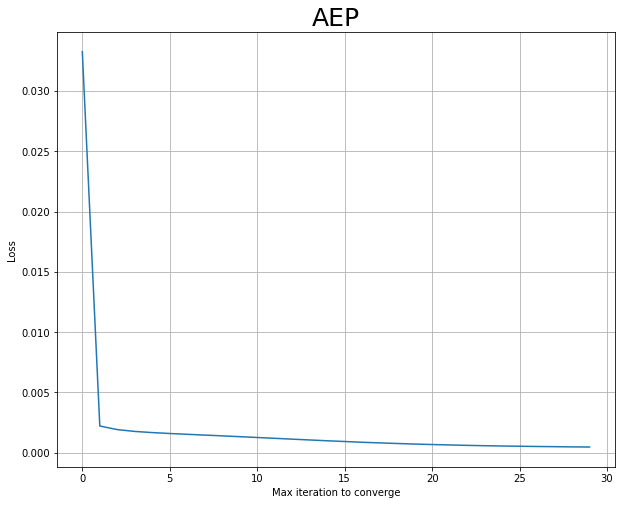

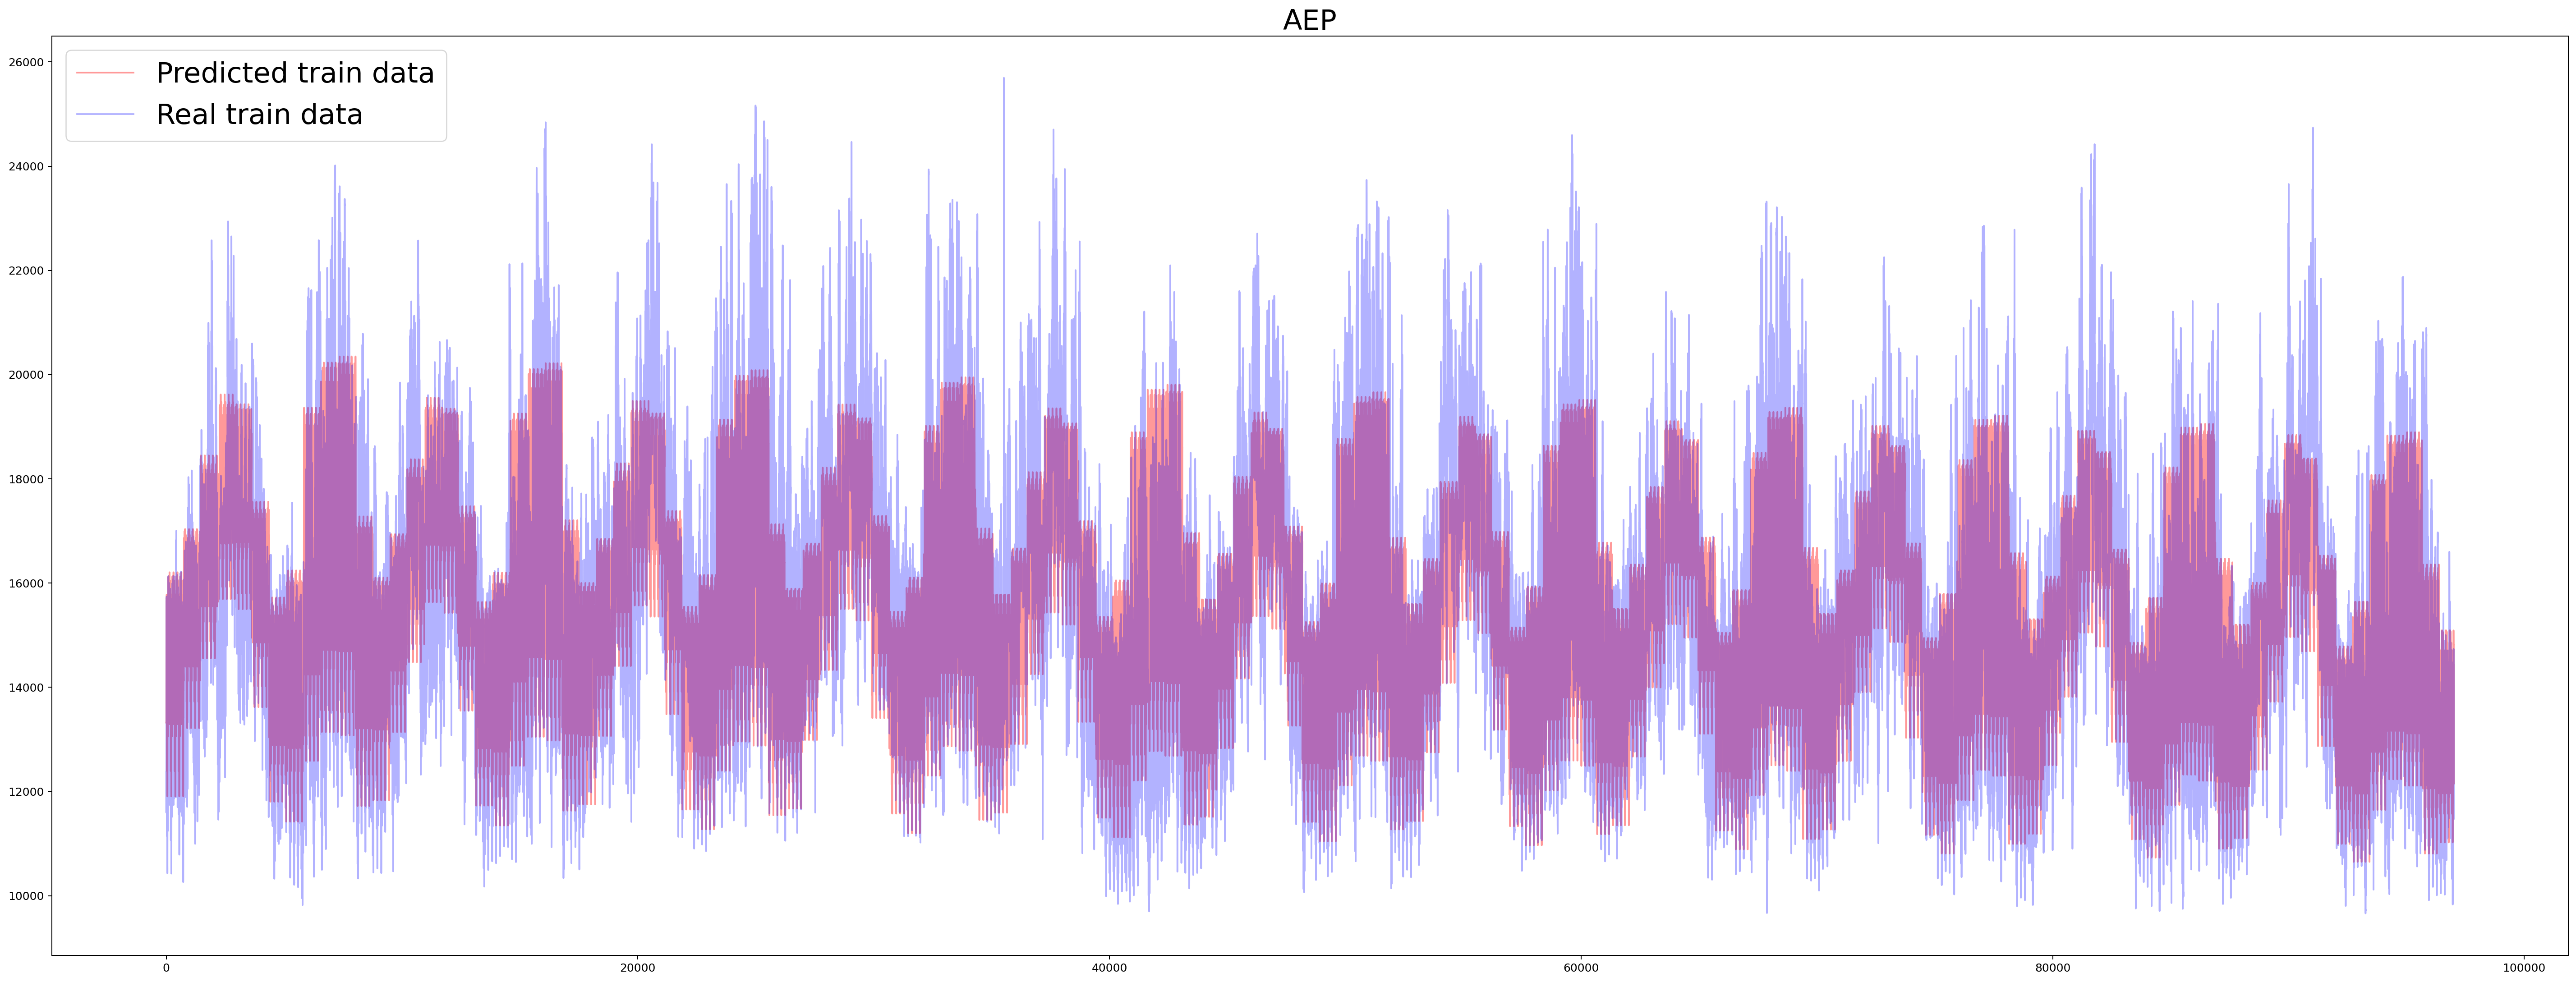

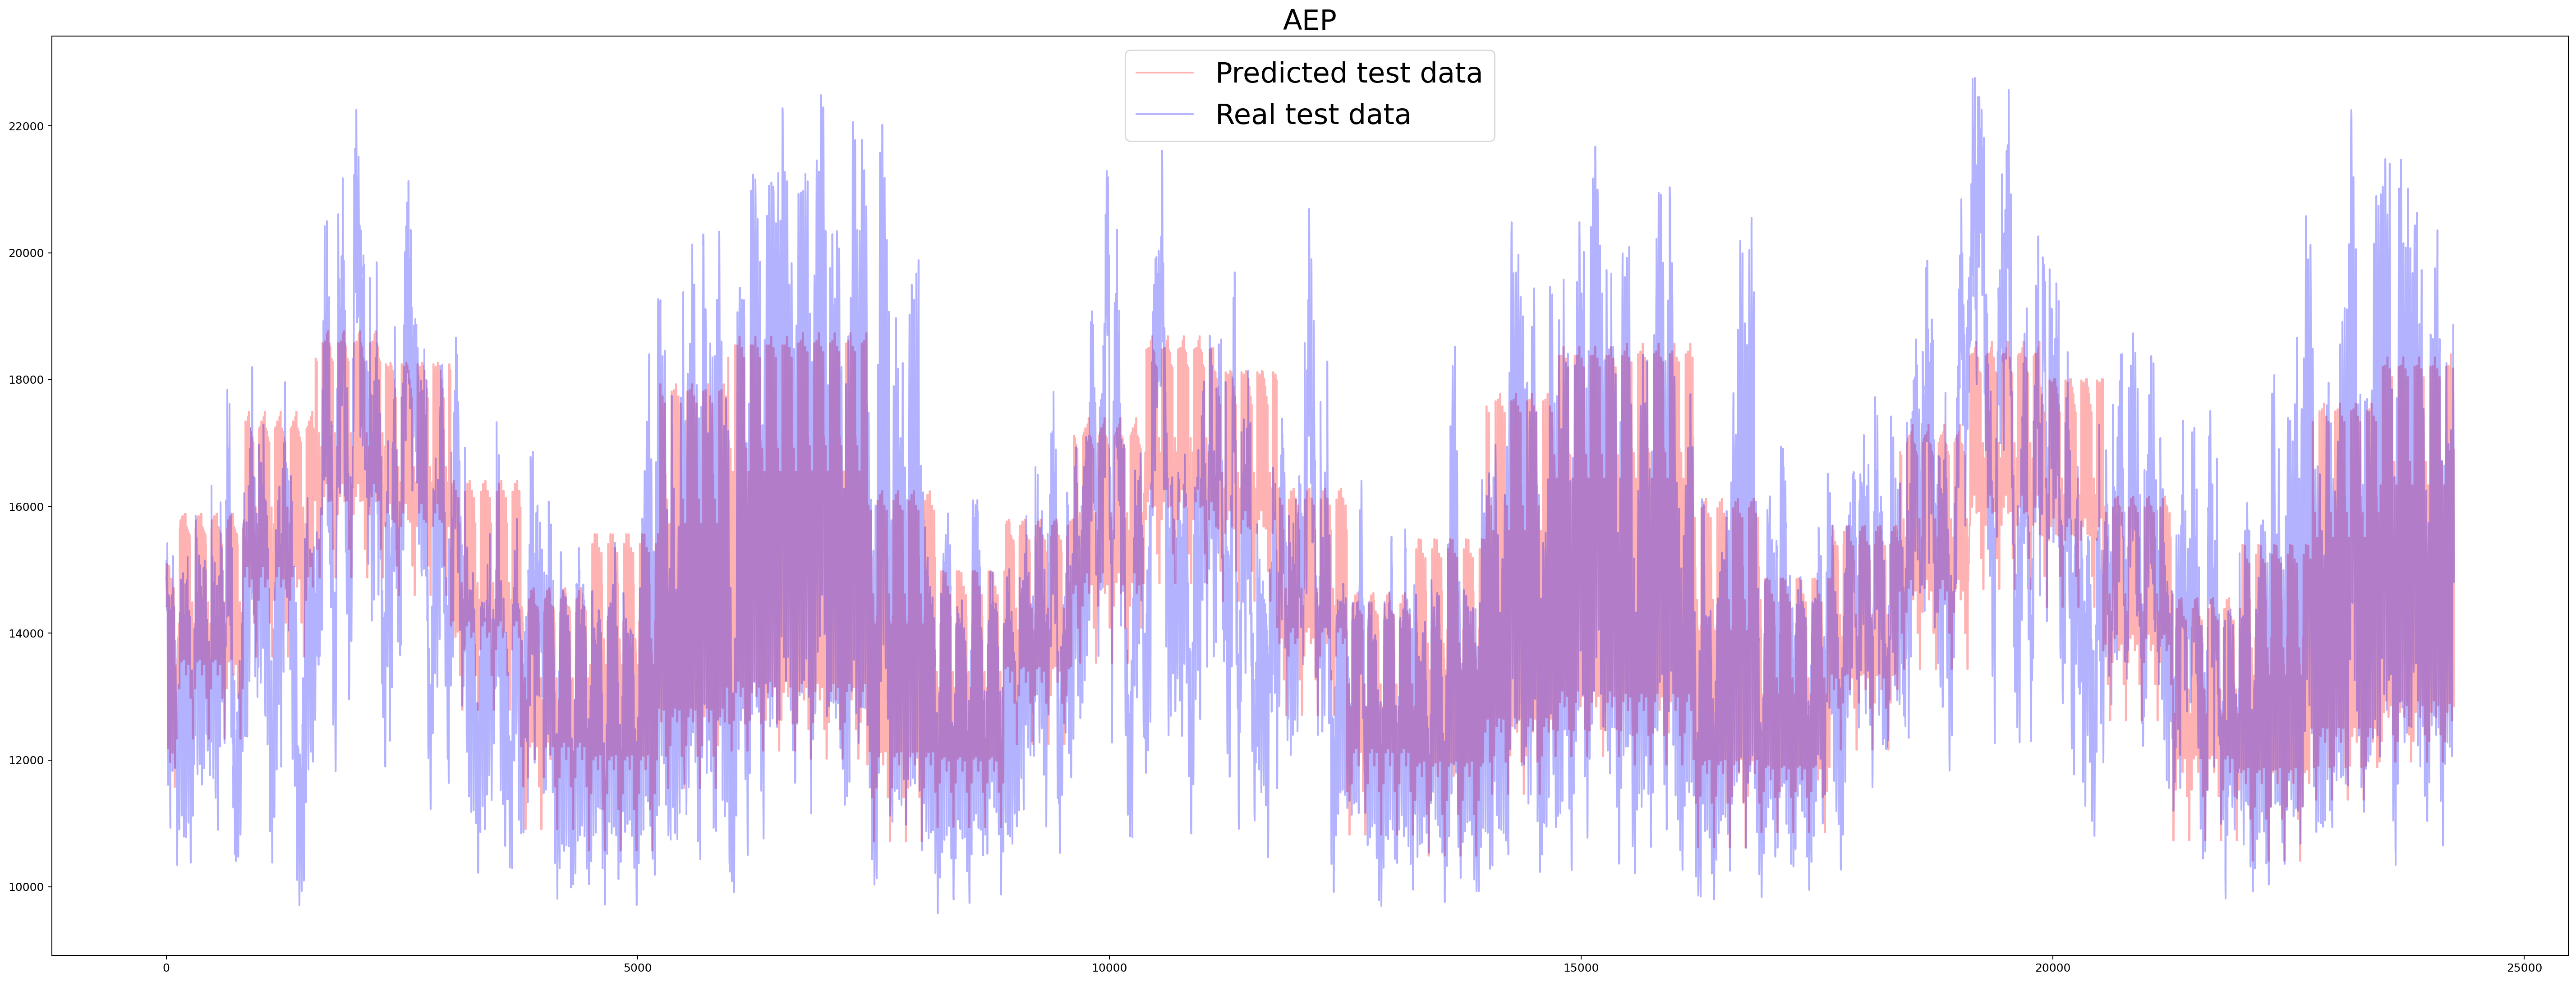

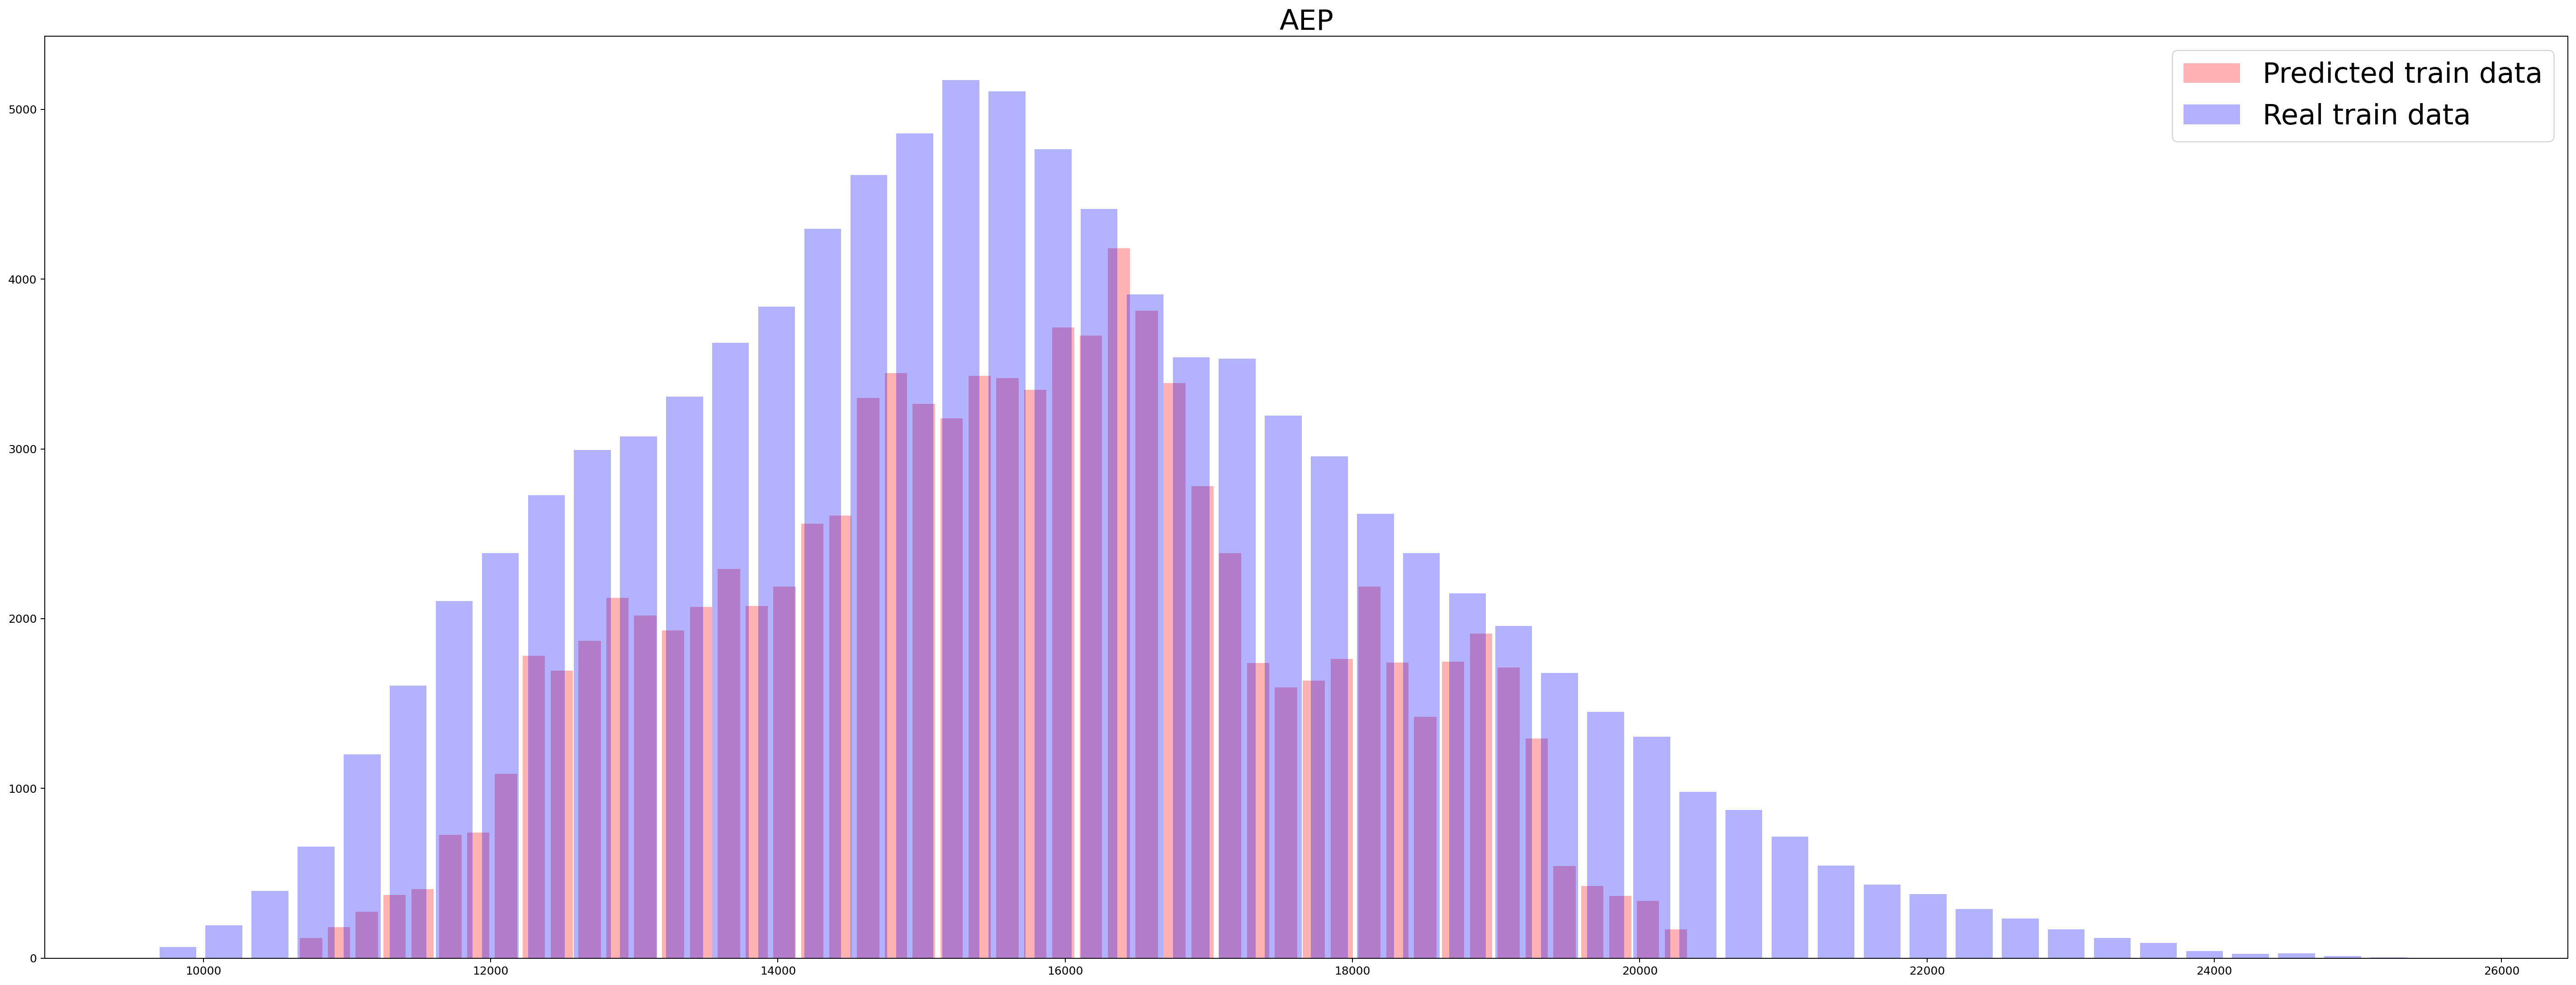

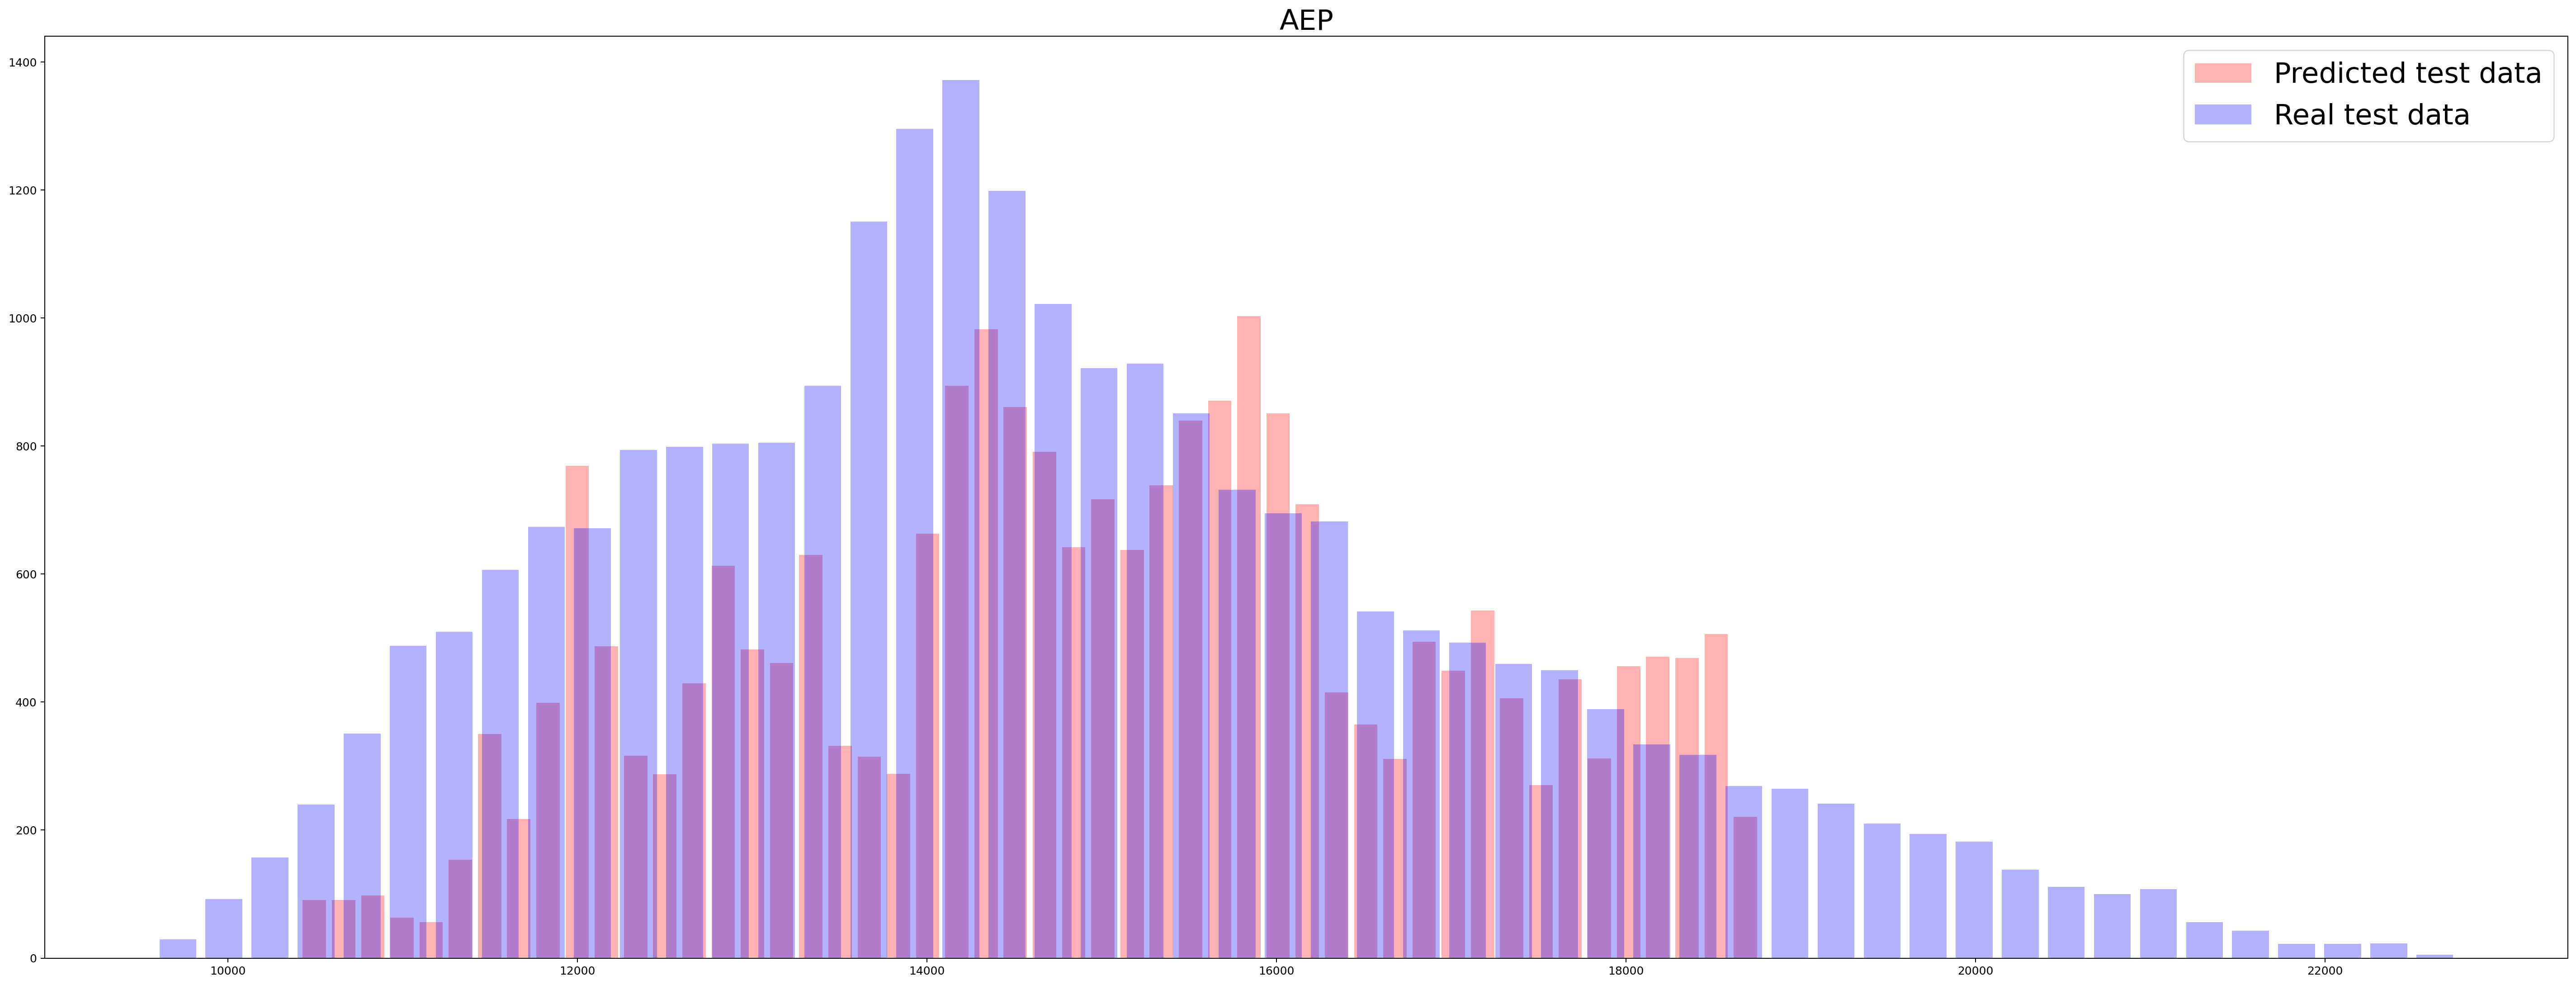

In [41]:
ml_model('AEP',h_layer_sizes = (15,15,15),
         act_fun ='tanh',
         sol_fun = 'adam',
         A_pa=0.01,
         Cross_val =0.2,
         fraction=0.8)


## 2) ML model for COMED electric company

In [42]:
trainX,_,_,_ =dummies_split(df6,'COMED')
trainX

electric_region      year  Day_session_Night  Day_session_Morning  \
458745           COMED  0.684211                  1                    0   
458753           COMED  0.684211                  1                    0   
458755           COMED  0.684211                  1                    0   
458765           COMED  0.684211                  1                    0   
458773           COMED  0.684211                  1                    0   
...                ...       ...                ...                  ...   
957090           COMED  1.000000                  0                    0   
957096           COMED  1.000000                  0                    0   
957112           COMED  1.000000                  0                    0   
957114           COMED  1.000000                  0                    0   
957131           COMED  1.000000                  0                    0   

        Day_session_Afternoon  Day_session_Evening  Season_Autumn  \
458745                      0                    0              0   
458753                      0                    0              0   
458755                      0                    0              0   
458765                      0                    0              0   
458773                      0                    0              0   
...                       ...                  ...            ...   
957090                      1                    0              0   
957096                      1                    0              0   
957112                      1                    0              0   
957114                      1                    0              0   
957131                      0                    1              0   

        Season_Spring  Season_Summer  Season_Winter  ...  month_3  month_4  \
458745              0              0              1  ...        0        0   
458753              0              0              1  ...        0        0   
458755              0              0              1  ...        0        0   
458765              0              0              1  ...        0        0   
458773              0              0              1  ...        0        0   
...               ...            ...            ...  ...      ...      ...   
957090              0              0              1  ...        0        0   
957096              0              0              1  ...        0        0   
957112              0              0              1  ...        0        0   
957114              0              0              1  ...        0        0   
957131              0              0              1  ...        0        0   

        month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
458745        0        0        0        0        0         0         0   
458753        0        0        0        0        0         0         0   
458755        0        0        0        0        0         0         0   
458765        0        0        0        0        0         0         0   
458773        0        0        0        0        0         0         0   
...         ...      ...      ...      ...      ...       ...       ...   
957090        0        0        0        0        0         0         0   
957096        0        0        0        0        0         0         0   
957112        0        0        0        0        0         0         0   
957114        0        0        0        0        0         0         0   
957131        0        0        0        0        0         0         0   

        month_12  
458745         0  
458753         0  
458755         0  
458765         0  
458773         0  
...          ...  
957090         0  
957096         0  
957112         0  
957114         0  
957131         0  

[53194 rows x 31 columns]

In [43]:
# ml_model('COMED',h_layer_sizes = (20,15,15),
#          act_fun ='tanh',
#          sol_fun = 'adam',
#          A_pa=0.005,
#          Cross_val =0.2,
#          fraction=0.8)
         


## 3) ML model for DAYTON electric company

In [44]:
trainX,_,_,_ =dummies_split(df6,'DAYTON')
trainX

electric_region      year  Day_session_Night  Day_session_Morning  \
82592           DAYTON  0.315789                  1                    0   
82597           DAYTON  0.315789                  1                    0   
82603           DAYTON  0.315789                  1                    0   
82608           DAYTON  0.315789                  1                    0   
82613           DAYTON  0.315789                  1                    0   
...                ...       ...                ...                  ...   
847525          DAYTON  0.894737                  1                    0   
847534          DAYTON  0.894737                  1                    0   
847547          DAYTON  0.894737                  1                    0   
847562          DAYTON  0.894737                  1                    0   
847572          DAYTON  0.894737                  1                    0   

        Day_session_Afternoon  Day_session_Evening  Season_Autumn  \
82592                       0                    0              1   
82597                       0                    0              1   
82603                       0                    0              1   
82608                       0                    0              1   
82613                       0                    0              1   
...                       ...                  ...            ...   
847525                      0                    0              1   
847534                      0                    0              1   
847547                      0                    0              1   
847562                      0                    0              1   
847572                      0                    0              1   

        Season_Spring  Season_Summer  Season_Winter  ...  month_3  month_4  \
82592               0              0              0  ...        0        0   
82597               0              0              0  ...        0        0   
82603               0              0              0  ...        0        0   
82608               0              0              0  ...        0        0   
82613               0              0              0  ...        0        0   
...               ...            ...            ...  ...      ...      ...   
847525              0              0              0  ...        0        0   
847534              0              0              0  ...        0        0   
847547              0              0              0  ...        0        0   
847562              0              0              0  ...        0        0   
847572              0              0              0  ...        0        0   

        month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
82592         0        0        0        0        0         1         0   
82597         0        0        0        0        0         1         0   
82603         0        0        0        0        0         1         0   
82608         0        0        0        0        0         1         0   
82613         0        0        0        0        0         1         0   
...         ...      ...      ...      ...      ...       ...       ...   
847525        0        0        0        0        0         1         0   
847534        0        0        0        0        0         1         0   
847547        0        0        0        0        0         1         0   
847562        0        0        0        0        0         1         0   
847572        0        0        0        0        0         1         0   

        month_12  
82592          0  
82597          0  
82603          0  
82608          0  
82613          0  
...          ...  
847525         0  
847534         0  
847547         0  
847562         0  
847572         0  

[97016 rows x 31 columns]

In [45]:
# ml_model('DAYTON',h_layer_sizes = (15,15,15),
#          act_fun ='tanh',
#          sol_fun = 'adam',
#          A_pa=0.001,
#          Cross_val =0.3,
#          fraction=0.8)

## 4) ML model for DEOK electric company

In [46]:
trainX,_,_,_ =dummies_split(df6,'DEOK')
trainX

electric_region      year  Day_session_Night  Day_session_Morning  \
525181            DEOK  0.736842                  1                    0   
525193            DEOK  0.736842                  1                    0   
525203            DEOK  0.736842                  1                    0   
525209            DEOK  0.736842                  1                    0   
525222            DEOK  0.736842                  1                    0   
...                ...       ...                ...                  ...   
974604            DEOK  1.000000                  0                    0   
974620            DEOK  1.000000                  0                    0   
974632            DEOK  1.000000                  0                    0   
974637            DEOK  1.000000                  0                    0   
974649            DEOK  1.000000                  0                    0   

        Day_session_Afternoon  Day_session_Evening  Season_Autumn  \
525181                      0                    0              0   
525193                      0                    0              0   
525203                      0                    0              0   
525209                      0                    0              0   
525222                      0                    0              0   
...                       ...                  ...            ...   
974604                      1                    0              0   
974620                      1                    0              0   
974632                      1                    0              0   
974637                      0                    1              0   
974649                      0                    1              0   

        Season_Spring  Season_Summer  Season_Winter  ...  month_3  month_4  \
525181              0              0              1  ...        0        0   
525193              0              0              1  ...        0        0   
525203              0              0              1  ...        0        0   
525209              0              0              1  ...        0        0   
525222              0              0              1  ...        0        0   
...               ...            ...            ...  ...      ...      ...   
974604              1              0              0  ...        0        1   
974620              1              0              0  ...        0        1   
974632              1              0              0  ...        0        1   
974637              1              0              0  ...        0        1   
974649              1              0              0  ...        0        1   

        month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
525181        0        0        0        0        0         0         0   
525193        0        0        0        0        0         0         0   
525203        0        0        0        0        0         0         0   
525209        0        0        0        0        0         0         0   
525222        0        0        0        0        0         0         0   
...         ...      ...      ...      ...      ...       ...       ...   
974604        0        0        0        0        0         0         0   
974620        0        0        0        0        0         0         0   
974632        0        0        0        0        0         0         0   
974637        0        0        0        0        0         0         0   
974649        0        0        0        0        0         0         0   

        month_12  
525181         0  
525193         0  
525203         0  
525209         0  
525222         0  
...          ...  
974604         0  
974620         0  
974632         0  
974637         0  
974649         0  

[46188 rows x 31 columns]

In [47]:
# ml_model('DEOK',h_layer_sizes = (15,15,15),
#          act_fun ='tanh',
#          sol_fun = 'adam',
#          A_pa=0.001,
#          Cross_val =0.1,
#          fraction=0.8)

## 5) ML model for DOM electric company

In [48]:
trainX,_,_,_ =dummies_split(df6,'DOM')
trainX

electric_region      year  Day_session_Night  Day_session_Morning  \
110899             DOM  0.368421                  1                    0   
110910             DOM  0.368421                  1                    0   
110915             DOM  0.368421                  1                    0   
110922             DOM  0.368421                  1                    0   
110928             DOM  0.368421                  1                    0   
...                ...       ...                ...                  ...   
857711             DOM  0.894737                  0                    1   
857716             DOM  0.894737                  0                    0   
857724             DOM  0.894737                  0                    0   
857740             DOM  0.894737                  0                    0   
857752             DOM  0.894737                  0                    0   

        Day_session_Afternoon  Day_session_Evening  Season_Autumn  \
110899                      0                    0              0   
110910                      0                    0              0   
110915                      0                    0              0   
110922                      0                    0              0   
110928                      0                    0              0   
...                       ...                  ...            ...   
857711                      0                    0              0   
857716                      1                    0              0   
857724                      1                    0              0   
857740                      1                    0              0   
857752                      1                    0              0   

        Season_Spring  Season_Summer  Season_Winter  ...  month_3  month_4  \
110899              1              0              0  ...        0        0   
110910              1              0              0  ...        0        0   
110915              1              0              0  ...        0        0   
110922              1              0              0  ...        0        0   
110928              1              0              0  ...        0        0   
...               ...            ...            ...  ...      ...      ...   
857711              0              0              1  ...        0        0   
857716              0              0              1  ...        0        0   
857724              0              0              1  ...        0        0   
857740              0              0              1  ...        0        0   
857752              0              0              1  ...        0        0   

        month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
110899        1        0        0        0        0         0         0   
110910        1        0        0        0        0         0         0   
110915        1        0        0        0        0         0         0   
110922        1        0        0        0        0         0         0   
110928        1        0        0        0        0         0         0   
...         ...      ...      ...      ...      ...       ...       ...   
857711        0        0        0        0        0         0         0   
857716        0        0        0        0        0         0         0   
857724        0        0        0        0        0         0         0   
857740        0        0        0        0        0         0         0   
857752        0        0        0        0        0         0         0   

        month_12  
110899         0  
110910         0  
110915         0  
110922         0  
110928         0  
...          ...  
857711         1  
857716         1  
857724         1  
857740         1  
857752         1  

[92947 rows x 31 columns]

In [49]:
# ml_model('DOM',h_layer_sizes = (15,15,15),
#          act_fun ='tanh',
#          sol_fun = 'adam',
#          A_pa=0.009,
#          Cross_val =0.2,
#          fraction=0.8)

## 6) ML model for DUQ electric company

In [50]:
trainX,_,_,_ =dummies_split(df6,'DUQ')
trainX

electric_region      year  Day_session_Night  Day_session_Morning  \
93626              DUQ  0.368421                  1                    0   
93632              DUQ  0.368421                  1                    0   
93638              DUQ  0.368421                  1                    0   
93642              DUQ  0.368421                  1                    0   
93651              DUQ  0.368421                  1                    0   
...                ...       ...                ...                  ...   
851953             DUQ  0.894737                  0                    1   
851963             DUQ  0.894737                  0                    0   
851964             DUQ  0.894737                  0                    0   
851981             DUQ  0.894737                  0                    0   
851988             DUQ  0.894737                  0                    0   

        Day_session_Afternoon  Day_session_Evening  Season_Autumn  \
93626                       0                    0              0   
93632                       0                    0              0   
93638                       0                    0              0   
93642                       0                    0              0   
93651                       0                    0              0   
...                       ...                  ...            ...   
851953                      0                    0              1   
851963                      1                    0              1   
851964                      1                    0              1   
851981                      1                    0              1   
851988                      1                    0              1   

        Season_Spring  Season_Summer  Season_Winter  ...  month_3  month_4  \
93626               0              0              1  ...        0        0   
93632               0              0              1  ...        0        0   
93638               0              0              1  ...        0        0   
93642               0              0              1  ...        0        0   
93651               0              0              1  ...        0        0   
...               ...            ...            ...  ...      ...      ...   
851953              0              0              0  ...        0        0   
851963              0              0              0  ...        0        0   
851964              0              0              0  ...        0        0   
851981              0              0              0  ...        0        0   
851988              0              0              0  ...        0        0   

        month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
93626         0        0        0        0        0         0         0   
93632         0        0        0        0        0         0         0   
93638         0        0        0        0        0         0         0   
93642         0        0        0        0        0         0         0   
93651         0        0        0        0        0         0         0   
...         ...      ...      ...      ...      ...       ...       ...   
851953        0        0        0        0        0         0         1   
851963        0        0        0        0        0         0         1   
851964        0        0        0        0        0         0         1   
851981        0        0        0        0        0         0         1   
851988        0        0        0        0        0         0         1   

        month_12  
93626          0  
93632          0  
93638          0  
93642          0  
93651          0  
...          ...  
851953         0  
851963         0  
851964         0  
851981         0  
851988         0  

[95251 rows x 31 columns]

The train score of model for DUQ is 0.6303966381246509 
The test score of model for DUQ is 0.5058015075325155 
RMSE for train data for is: 0.002965325378604982 and  RMSE for test data is: 0.0033509583299033904
MAPE for train data is: 0.11465382002061725 and MAPE for test data is: 0.1705961626574663


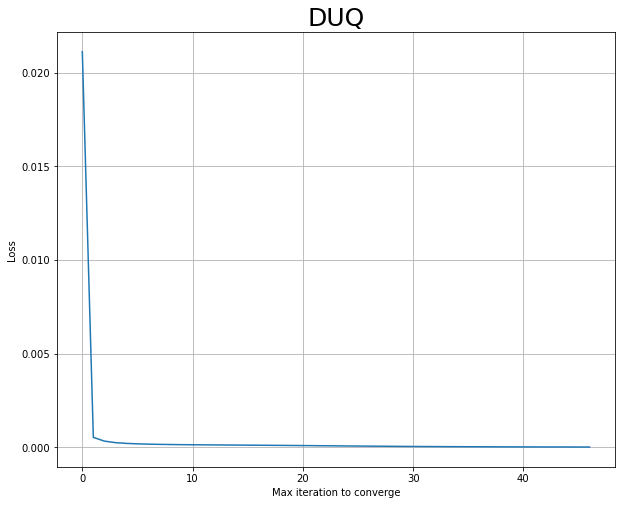

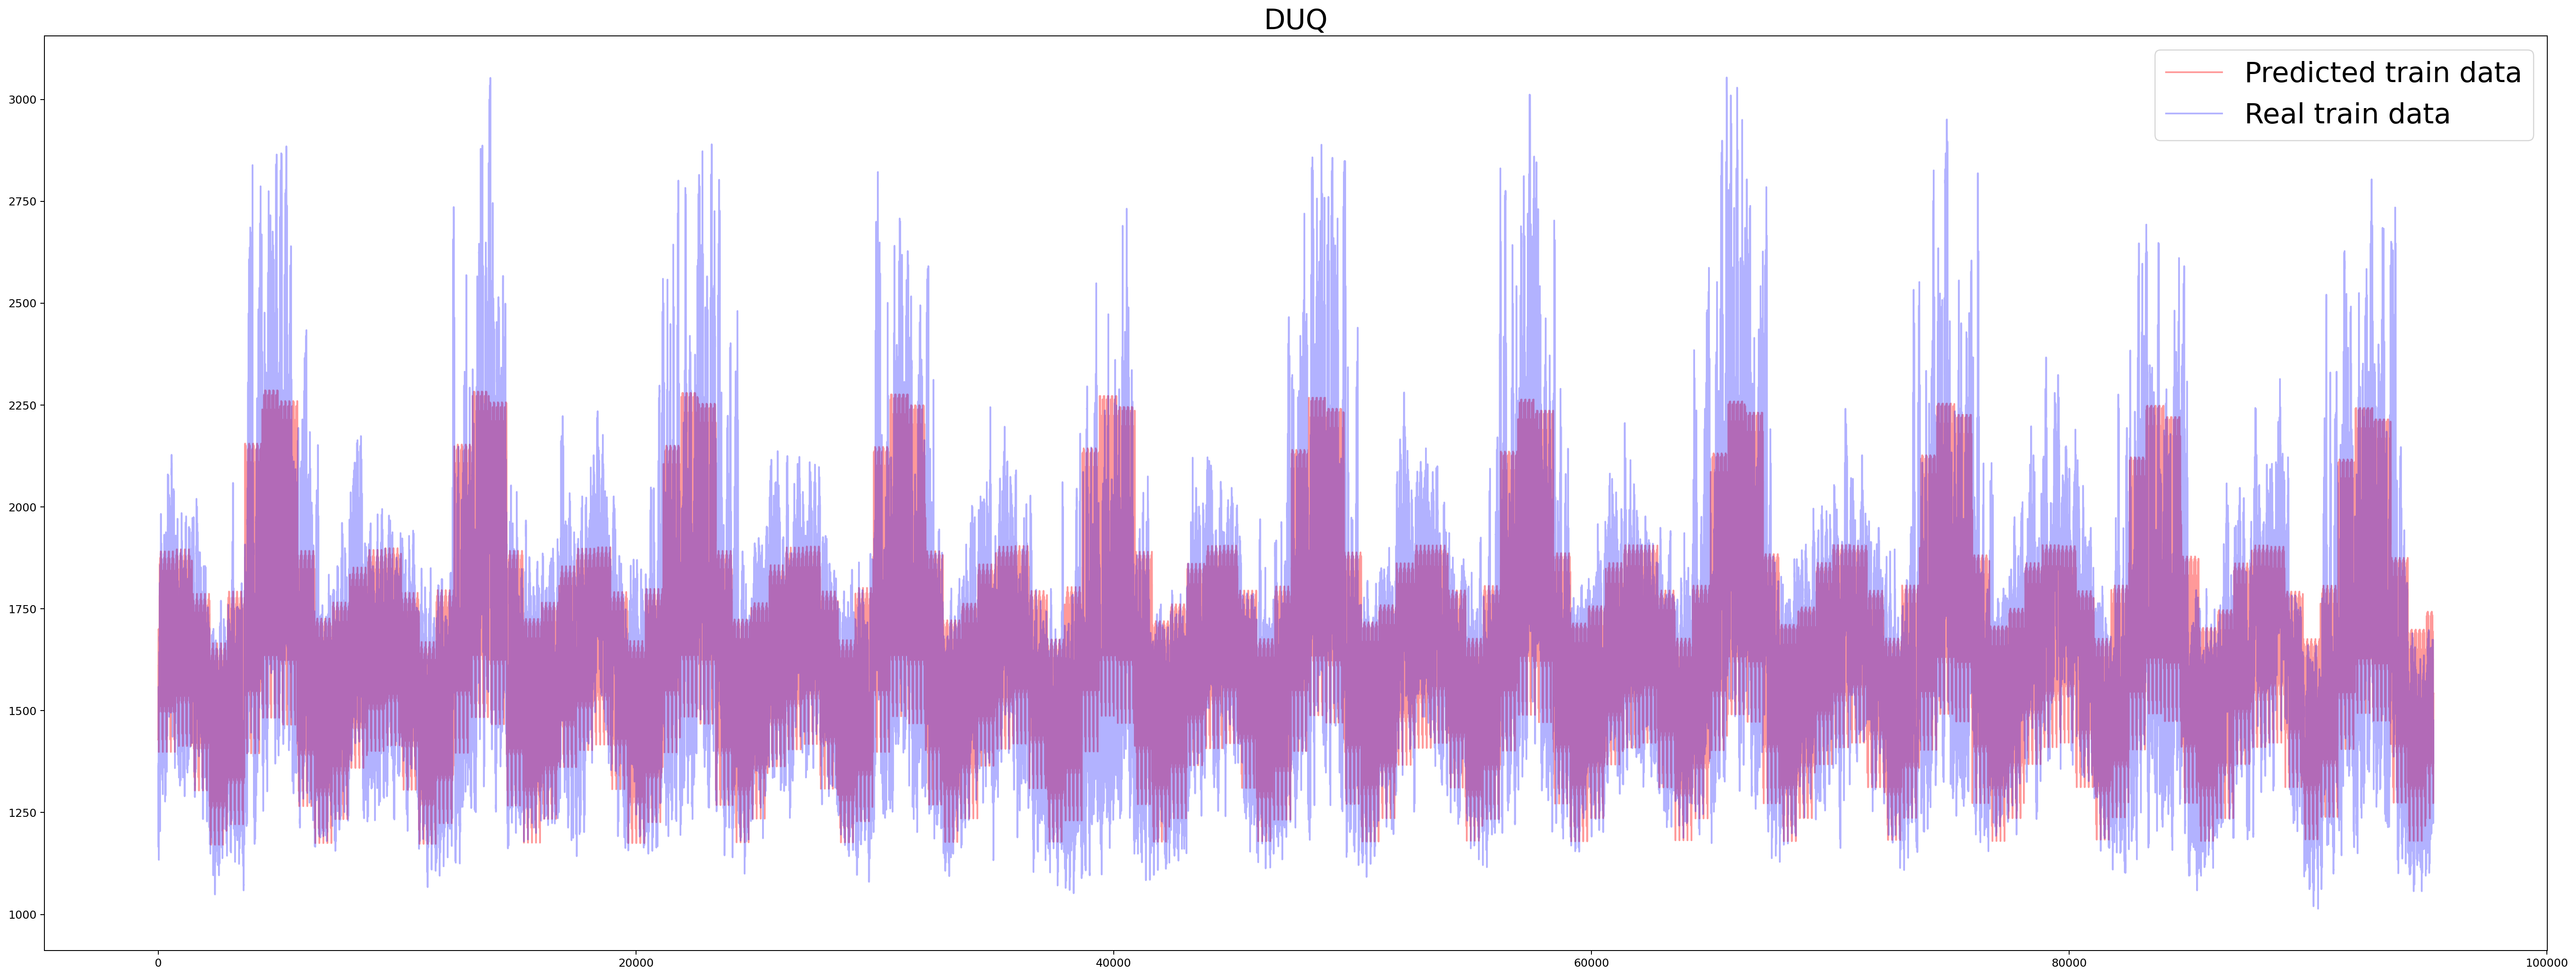

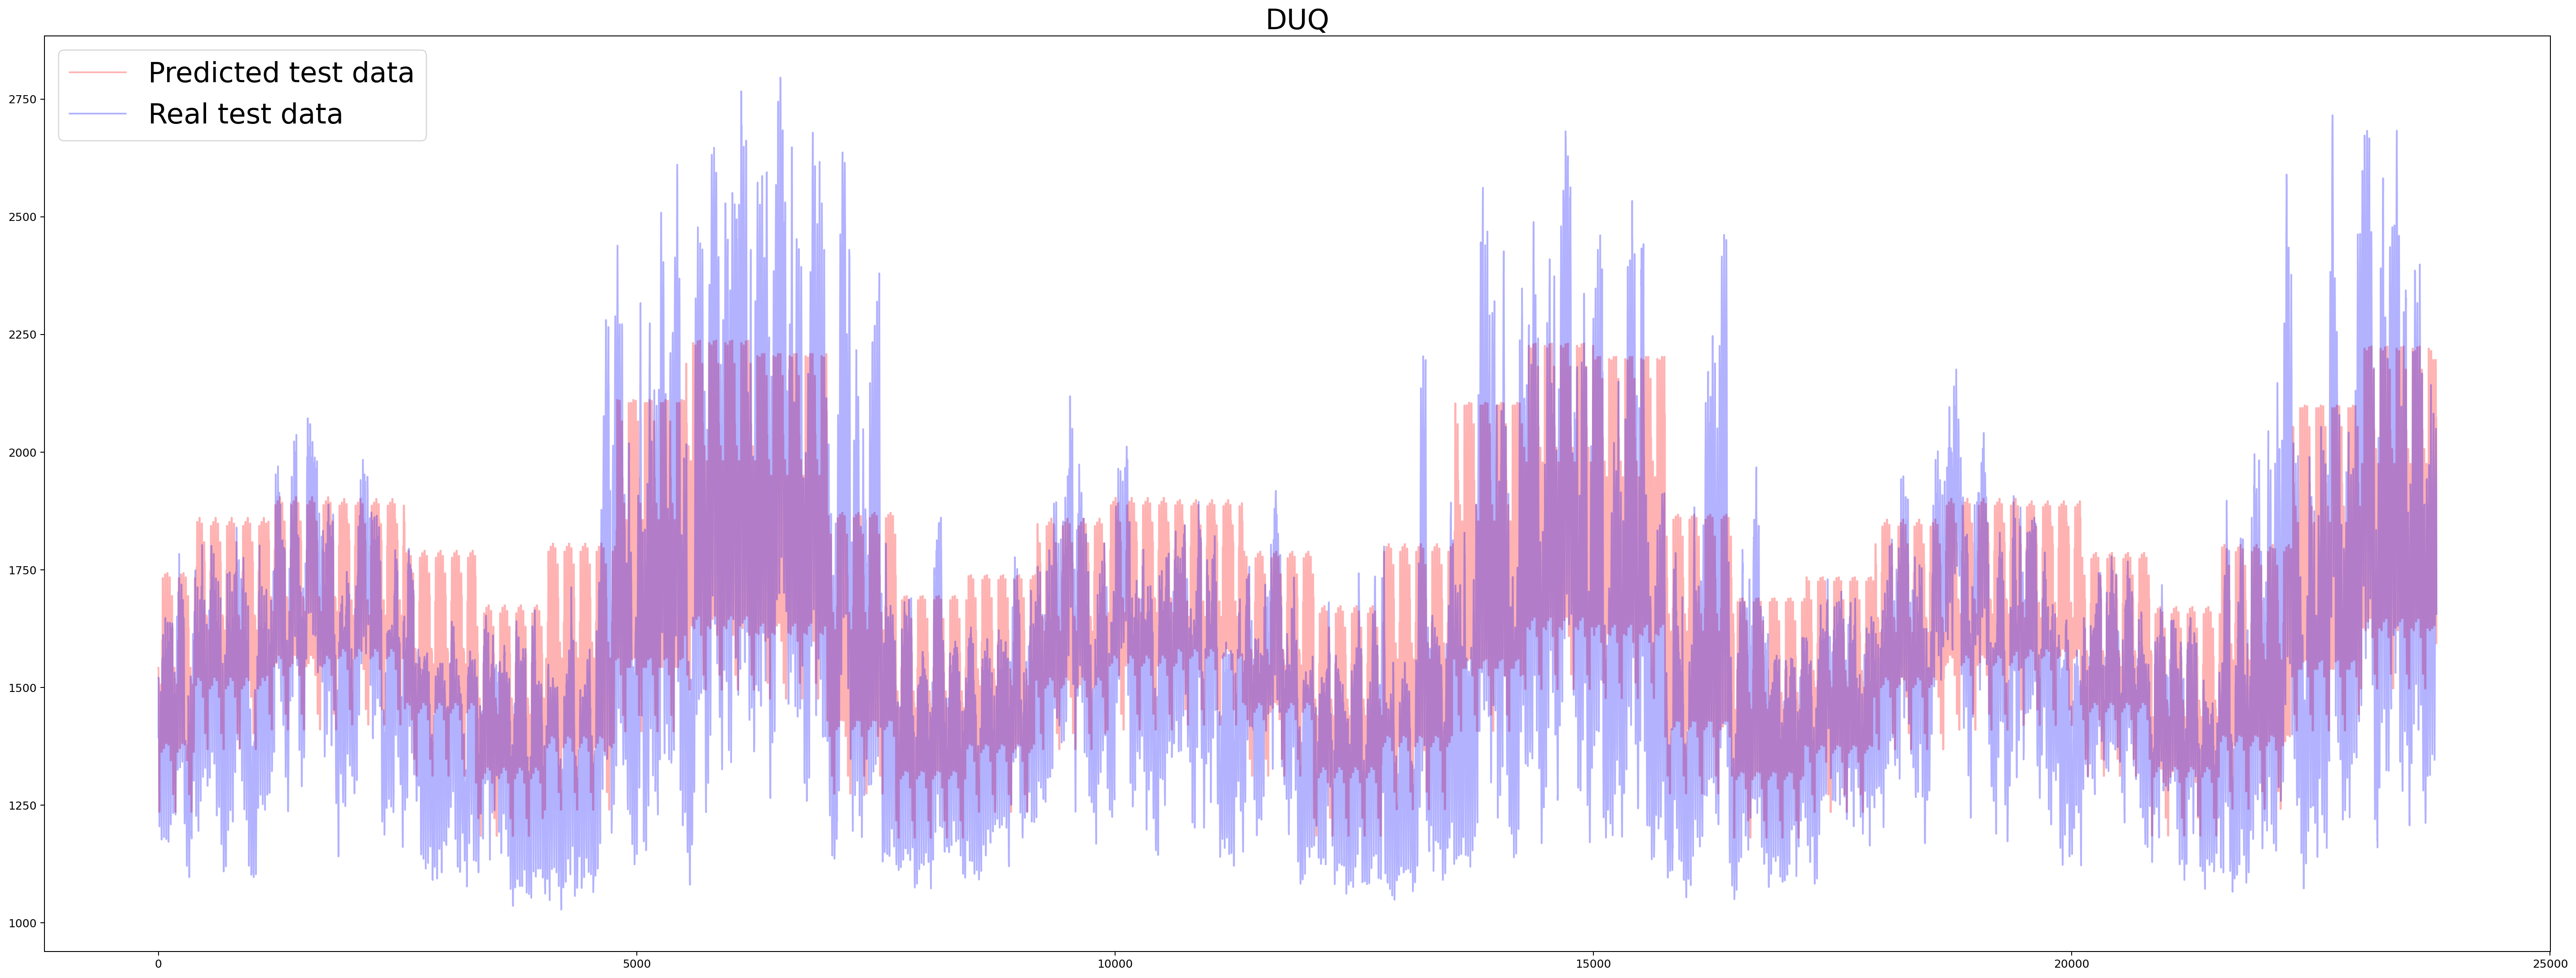

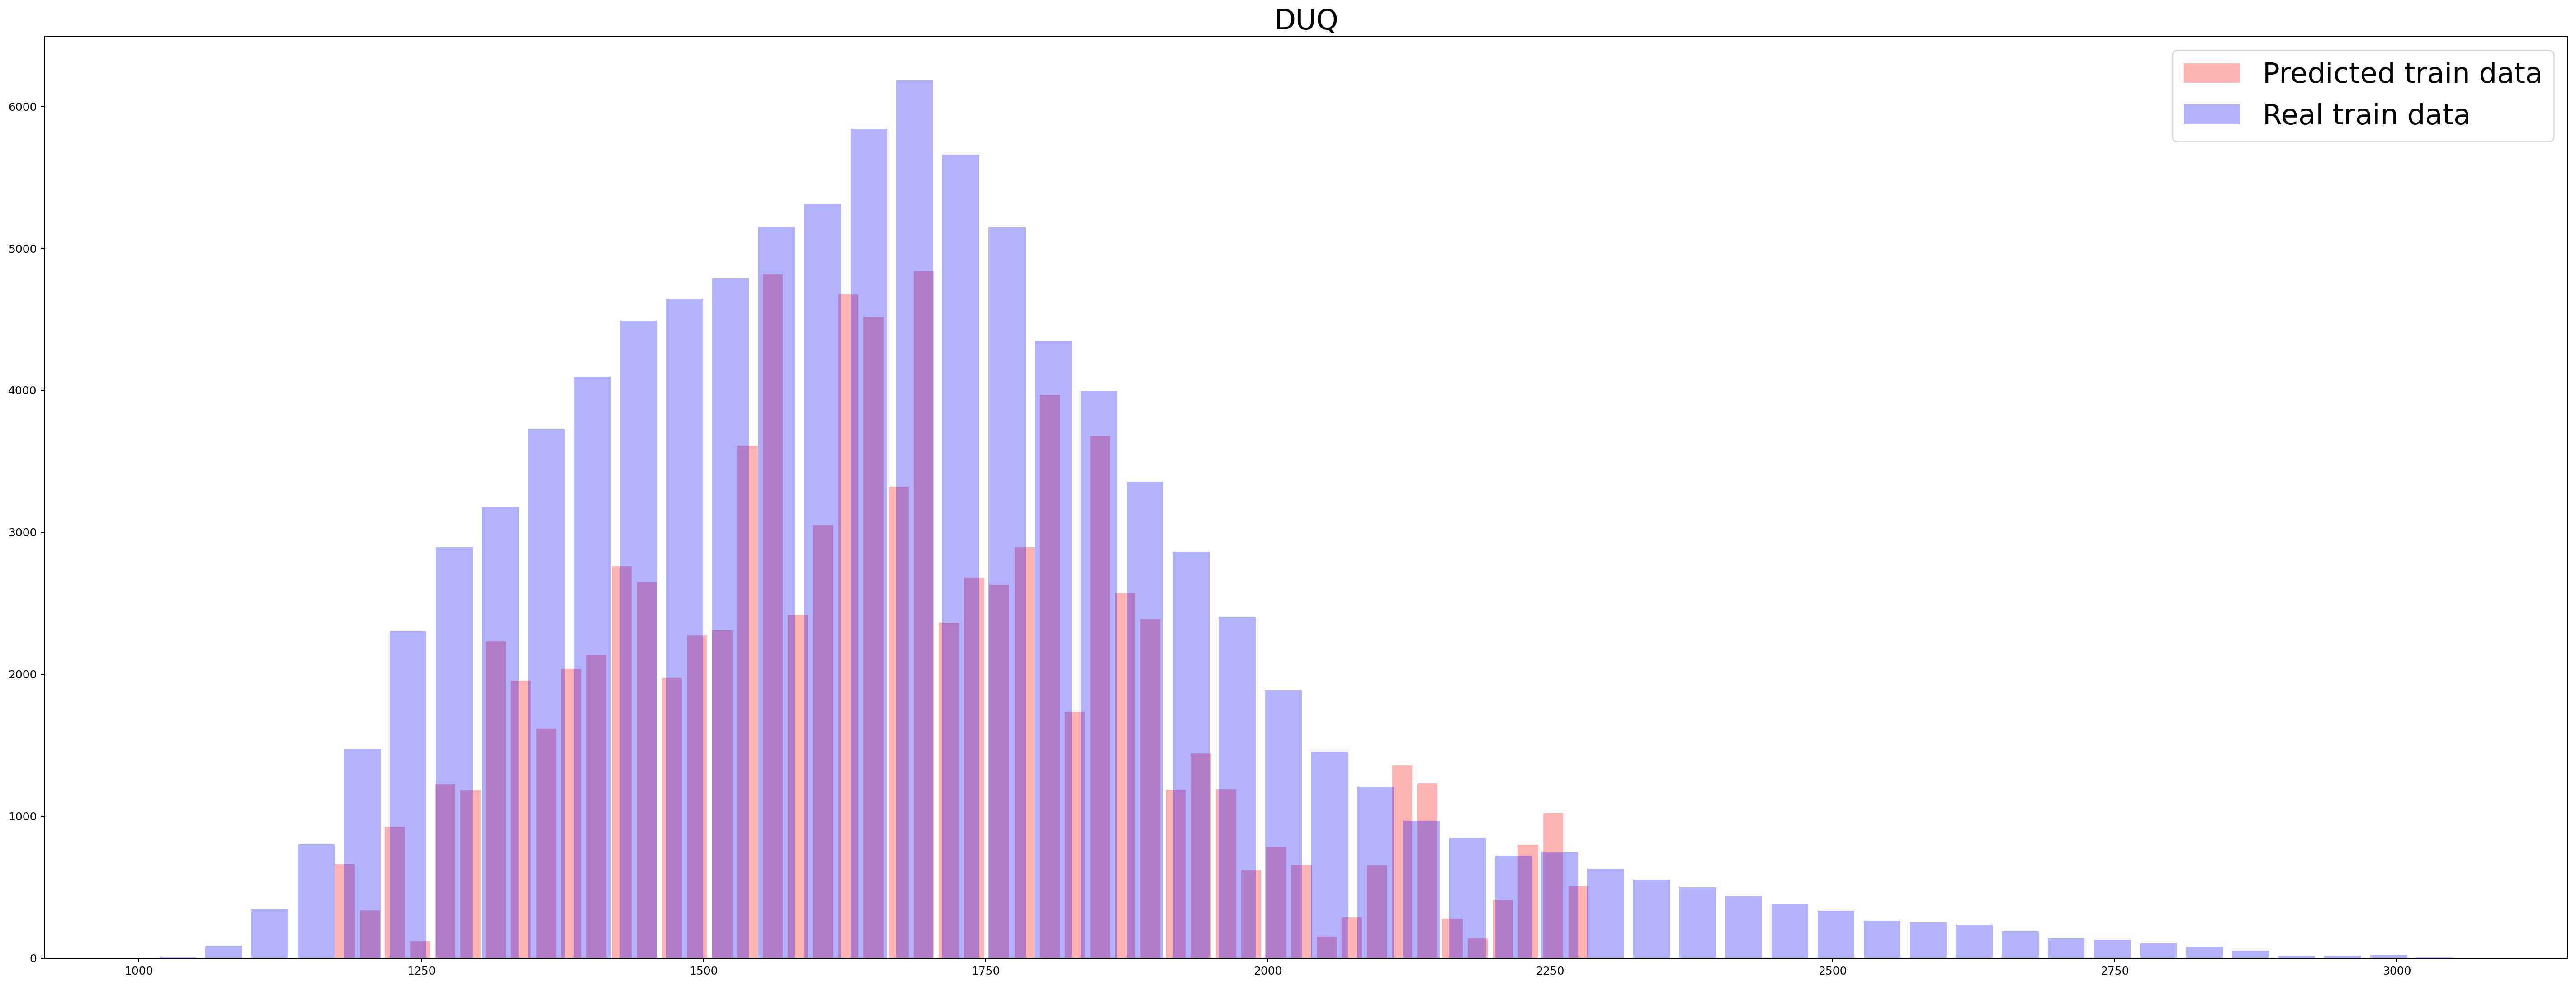

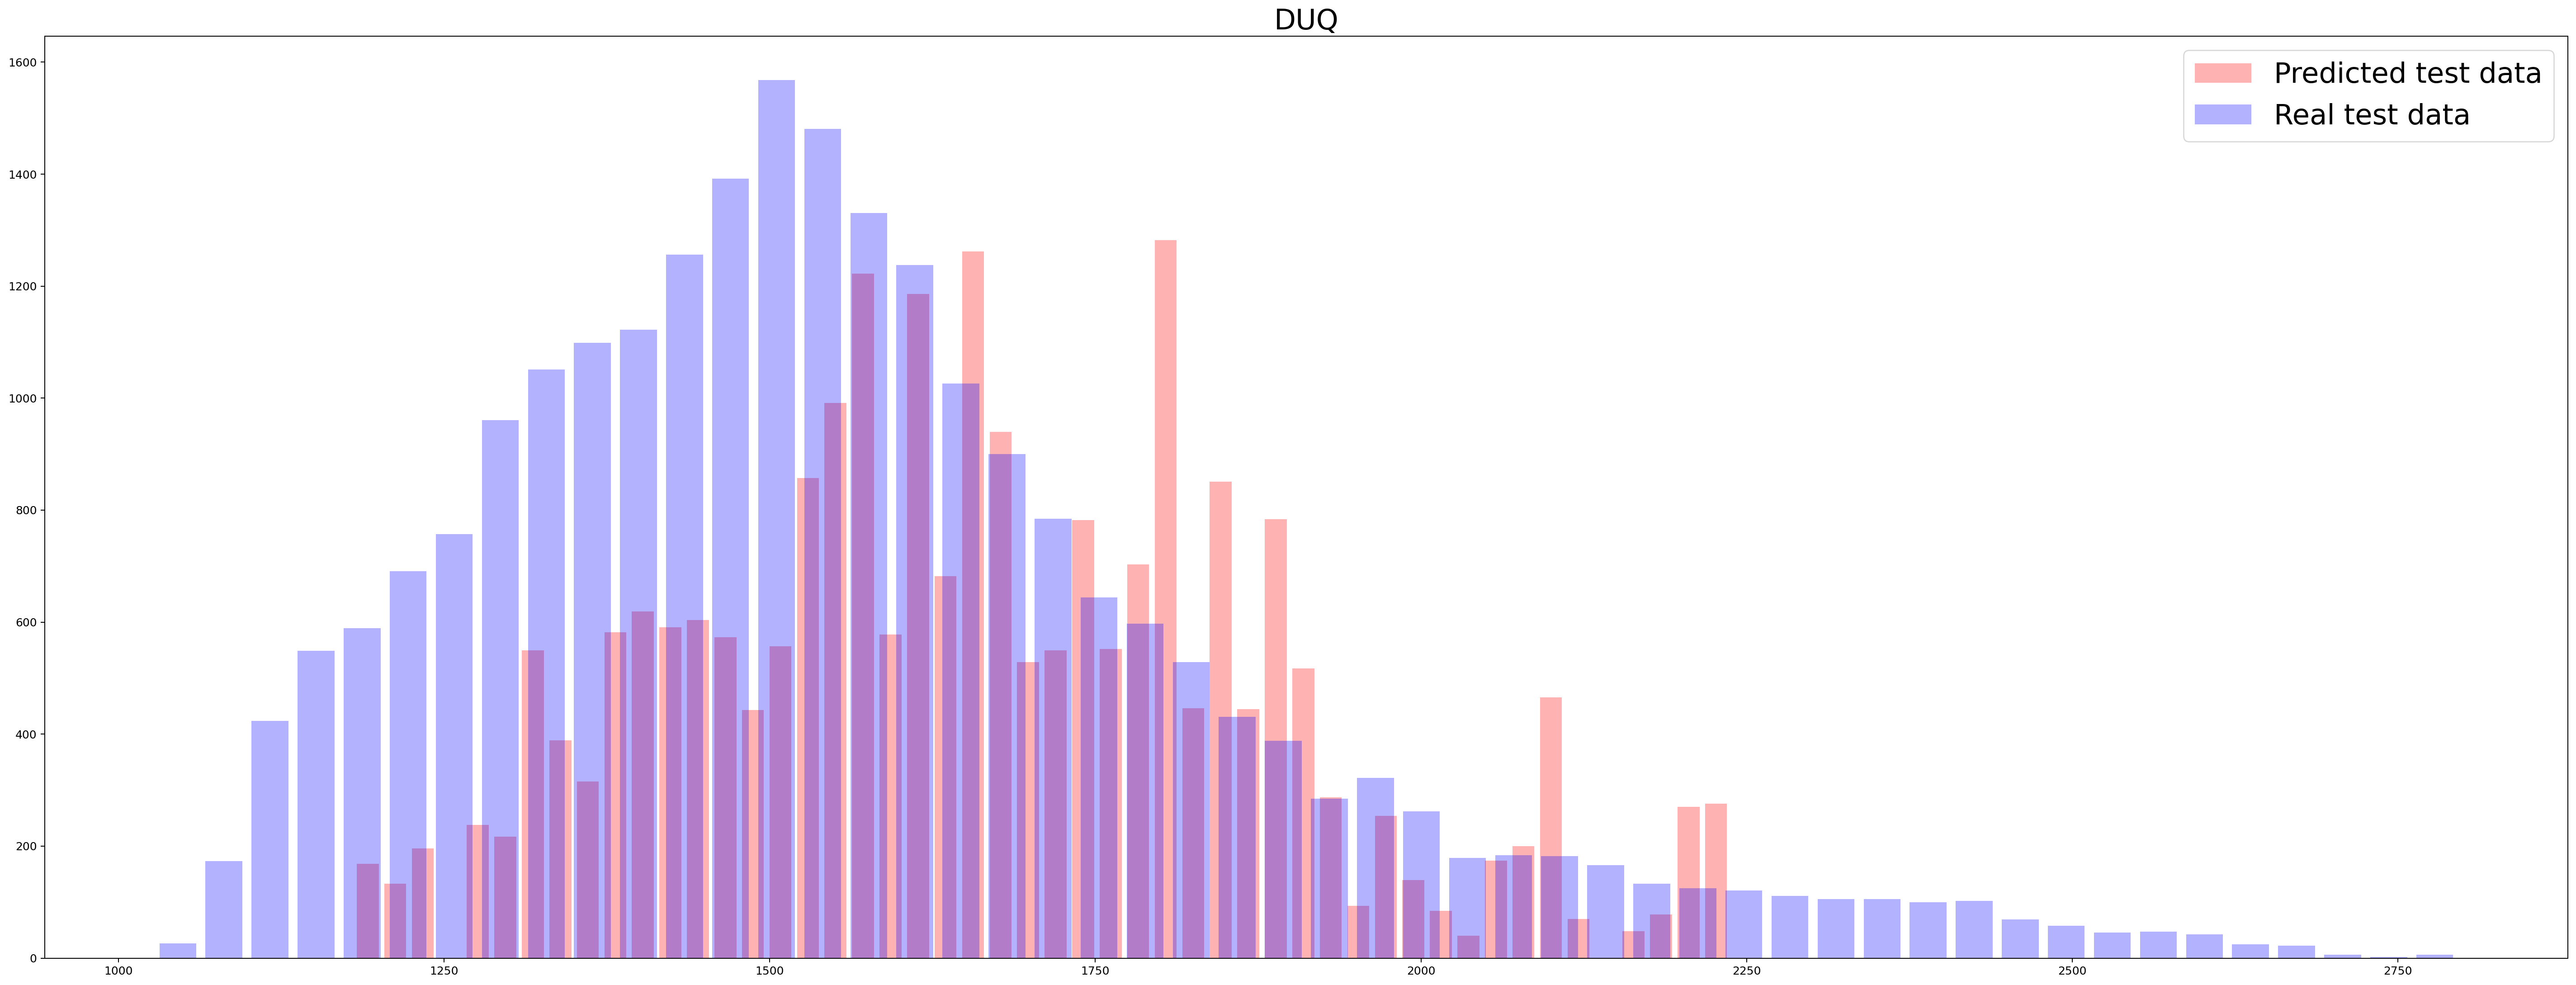

In [51]:
ml_model('DUQ',h_layer_sizes = (15,15,15),
         act_fun ='tanh',
         sol_fun = 'adam',
         A_pa=0.001,
         Cross_val =0.2,
         fraction=0.8)

#change in hyperparamter with reducing alpha

## 7) ML model for EKPC electric company

In [52]:
trainX,_,_,_ =dummies_split(df6,'EKPC')
trainX

electric_region      year  Day_session_Night  Day_session_Morning  \
636834            EKPC  0.789474                  1                    0   
636838            EKPC  0.789474                  1                    0   
636848            EKPC  0.789474                  1                    0   
636856            EKPC  0.789474                  1                    0   
636866            EKPC  0.789474                  1                    0   
...                ...       ...                ...                  ...   
999419            EKPC  1.000000                  1                    0   
999428            EKPC  1.000000                  1                    0   
999438            EKPC  1.000000                  1                    0   
999447            EKPC  1.000000                  1                    0   
999461            EKPC  1.000000                  1                    0   

        Day_session_Afternoon  Day_session_Evening  Season_Autumn  \
636834                      0                    0              0   
636838                      0                    0              0   
636848                      0                    0              0   
636856                      0                    0              0   
636866                      0                    0              0   
...                       ...                  ...            ...   
999419                      0                    0              0   
999428                      0                    0              0   
999438                      0                    0              0   
999447                      0                    0              0   
999461                      0                    0              0   

        Season_Spring  Season_Summer  Season_Winter  ...  month_3  month_4  \
636834              0              1              0  ...        0        0   
636838              0              1              0  ...        0        0   
636848              0              1              0  ...        0        0   
636856              0              1              0  ...        0        0   
636866              0              1              0  ...        0        0   
...               ...            ...            ...  ...      ...      ...   
999419              0              1              0  ...        0        0   
999428              0              1              0  ...        0        0   
999438              0              1              0  ...        0        0   
999447              0              1              0  ...        0        0   
999461              0              1              0  ...        0        0   

        month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
636834        0        1        0        0        0         0         0   
636838        0        1        0        0        0         0         0   
636848        0        1        0        0        0         0         0   
636856        0        1        0        0        0         0         0   
636866        0        1        0        0        0         0         0   
...         ...      ...      ...      ...      ...       ...       ...   
999419        0        0        1        0        0         0         0   
999428        0        0        1        0        0         0         0   
999438        0        0        1        0        0         0         0   
999447        0        0        1        0        0         0         0   
999461        0        0        1        0        0         0         0   

        month_12  
636834         0  
636838         0  
636848         0  
636856         0  
636866         0  
...          ...  
999419         0  
999428         0  
999438         0  
999447         0  
999461         0  

[36264 rows x 31 columns]

In [53]:
# ml_model('EKPC',h_layer_sizes = (15,15,15),
#          act_fun ='relu',
#          sol_fun = 'adam',
#          A_pa=0.01,
#          Cross_val =0.2,
#          fraction=0.8)

## 8) ML model for FE electric company

In [54]:
trainX,_,_,_ =dummies_split(df6,'FE')
trainX

electric_region      year  Day_session_Night  Day_session_Morning  \
484113              FE  0.684211                  1                    0   
484119              FE  0.684211                  1                    0   
484129              FE  0.684211                  1                    0   
484133              FE  0.684211                  1                    0   
484147              FE  0.684211                  1                    0   
...                ...       ...                ...                  ...   
964340              FE  1.000000                  0                    0   
964349              FE  1.000000                  0                    0   
964363              FE  1.000000                  0                    0   
964365              FE  1.000000                  0                    0   
964375              FE  1.000000                  1                    0   

        Day_session_Afternoon  Day_session_Evening  Season_Autumn  \
484113                      0                    0              0   
484119                      0                    0              0   
484129                      0                    0              0   
484133                      0                    0              0   
484147                      0                    0              0   
...                       ...                  ...            ...   
964340                      0                    1              0   
964349                      0                    1              0   
964363                      0                    1              0   
964365                      0                    1              0   
964375                      0                    0              0   

        Season_Spring  Season_Summer  Season_Winter  ...  month_3  month_4  \
484113              0              1              0  ...        0        0   
484119              0              1              0  ...        0        0   
484129              0              1              0  ...        0        0   
484133              0              1              0  ...        0        0   
484147              0              1              0  ...        0        0   
...               ...            ...            ...  ...      ...      ...   
964340              0              0              1  ...        0        0   
964349              0              0              1  ...        0        0   
964363              0              0              1  ...        0        0   
964365              0              0              1  ...        0        0   
964375              0              0              1  ...        0        0   

        month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
484113        0        1        0        0        0         0         0   
484119        0        1        0        0        0         0         0   
484129        0        1        0        0        0         0         0   
484133        0        1        0        0        0         0         0   
484147        0        1        0        0        0         0         0   
...         ...      ...      ...      ...      ...       ...       ...   
964340        0        0        0        0        0         0         0   
964349        0        0        0        0        0         0         0   
964363        0        0        0        0        0         0         0   
964365        0        0        0        0        0         0         0   
964375        0        0        0        0        0         0         0   

        month_12  
484113         0  
484119         0  
484129         0  
484133         0  
484147         0  
...          ...  
964340         0  
964349         0  
964363         0  
964365         0  
964375         0  

[50295 rows x 31 columns]

In [55]:
# ml_model('FE',h_layer_sizes = (15,15,15),
#          act_fun ='tanh',
#          sol_fun = 'adam',
#          A_pa=0.0008,
#          Cross_val =0.1,
#          fraction=0.8)

## 9) ML model for NI electric company

In [56]:
trainX,_,_,_ =dummies_split(df6,'NI')
trainX

electric_region      year  Day_session_Night  Day_session_Morning  \
71573               NI  0.315789                  1                    0   
71576               NI  0.315789                  1                    0   
71581               NI  0.315789                  1                    0   
71582               NI  0.315789                  1                    0   
71587               NI  0.315789                  1                    0   
...                ...       ...                ...                  ...   
376877              NI  0.578947                  0                    0   
376885              NI  0.578947                  0                    0   
376897              NI  0.578947                  0                    0   
376902              NI  0.578947                  0                    0   
376908              NI  0.578947                  0                    0   

        Day_session_Afternoon  Day_session_Evening  Season_Autumn  \
71573                       0                    0              0   
71576                       0                    0              0   
71581                       0                    0              0   
71582                       0                    0              0   
71587                       0                    0              0   
...                       ...                  ...            ...   
376877                      1                    0              0   
376885                      1                    0              0   
376897                      1                    0              0   
376902                      1                    0              0   
376908                      1                    0              0   

        Season_Spring  Season_Summer  Season_Winter  ...  month_3  month_4  \
71573               1              0              0  ...        0        0   
71576               1              0              0  ...        0        0   
71581               1              0              0  ...        0        0   
71582               1              0              0  ...        0        0   
71587               1              0              0  ...        0        0   
...               ...            ...            ...  ...      ...      ...   
376877              0              1              0  ...        0        0   
376885              0              1              0  ...        0        0   
376897              0              1              0  ...        0        0   
376902              0              1              0  ...        0        0   
376908              0              1              0  ...        0        0   

        month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
71573         1        0        0        0        0         0         0   
71576         1        0        0        0        0         0         0   
71581         1        0        0        0        0         0         0   
71582         1        0        0        0        0         0         0   
71587         1        0        0        0        0         0         0   
...         ...      ...      ...      ...      ...       ...       ...   
376877        0        0        0        1        0         0         0   
376885        0        0        0        1        0         0         0   
376897        0        0        0        1        0         0         0   
376902        0        0        0        1        0         0         0   
376908        0        0        0        1        0         0         0   

        month_12  
71573          0  
71576          0  
71581          0  
71582          0  
71587          0  
...          ...  
376877         0  
376885         0  
376897         0  
376902         0  
376908         0  

[46760 rows x 31 columns]

In [57]:
# ml_model('NI',h_layer_sizes = (15,15,15),
#          act_fun ='tanh',
#          sol_fun = 'adam',
#          A_pa=0.0001,
#          Cross_val =0.1,
#          fraction=0.8)

## 10) ML model for PJME electric company

In [58]:
trainX,_,_,_ =dummies_split(df6,'PJME')
trainX

electric_region      year  Day_session_Night  Day_session_Morning  \
32896             PJME  0.210526                  1                    0   
32897             PJME  0.210526                  1                    0   
32898             PJME  0.210526                  1                    0   
32899             PJME  0.210526                  1                    0   
32900             PJME  0.210526                  1                    0   
...                ...       ...                ...                  ...   
799353            PJME  0.894737                  0                    1   
799360            PJME  0.894737                  0                    1   
799366            PJME  0.894737                  0                    1   
799380            PJME  0.894737                  0                    1   
799385            PJME  0.894737                  0                    1   

        Day_session_Afternoon  Day_session_Evening  Season_Autumn  \
32896                       0                    0              0   
32897                       0                    0              0   
32898                       0                    0              0   
32899                       0                    0              0   
32900                       0                    0              0   
...                       ...                  ...            ...   
799353                      0                    0              0   
799360                      0                    0              0   
799366                      0                    0              0   
799380                      0                    0              0   
799385                      0                    0              0   

        Season_Spring  Season_Summer  Season_Winter  ...  month_3  month_4  \
32896               0              0              1  ...        0        0   
32897               0              0              1  ...        0        0   
32898               0              0              1  ...        0        0   
32899               0              0              1  ...        0        0   
32900               0              0              1  ...        0        0   
...               ...            ...            ...  ...      ...      ...   
799353              1              0              0  ...        0        1   
799360              1              0              0  ...        0        1   
799366              1              0              0  ...        0        1   
799380              1              0              0  ...        0        1   
799385              1              0              0  ...        0        1   

        month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
32896         0        0        0        0        0         0         0   
32897         0        0        0        0        0         0         0   
32898         0        0        0        0        0         0         0   
32899         0        0        0        0        0         0         0   
32900         0        0        0        0        0         0         0   
...         ...      ...      ...      ...      ...       ...       ...   
799353        0        0        0        0        0         0         0   
799360        0        0        0        0        0         0         0   
799366        0        0        0        0        0         0         0   
799380        0        0        0        0        0         0         0   
799385        0        0        0        0        0         0         0   

        month_12  
32896          0  
32897          0  
32898          0  
32899          0  
32900          0  
...          ...  
799353         0  
799360         0  
799366         0  
799380         0  
799385         0  

[116289 rows x 31 columns]

In [59]:
# ml_model('PJME',h_layer_sizes = (15,15,15),
#          act_fun ='tanh',
#          sol_fun = 'adam',
#          A_pa=0.01,
#          Cross_val =0.2,
#          fraction=0.8)

## 11) ML model for PJMW electric company

In [60]:
trainX,_,_,_ =dummies_split(df6,'PJMW')
trainX

electric_region      year  Day_session_Night  Day_session_Morning  \
35057             PJMW  0.210526                  1                    0   
35059             PJMW  0.210526                  1                    0   
35061             PJMW  0.210526                  1                    0   
35062             PJMW  0.210526                  1                    0   
35064             PJMW  0.210526                  1                    0   
...                ...       ...                ...                  ...   
803665            PJMW  0.894737                  0                    1   
803675            PJMW  0.894737                  0                    1   
803692            PJMW  0.894737                  0                    1   
803697            PJMW  0.894737                  0                    1   
803708            PJMW  0.894737                  0                    1   

        Day_session_Afternoon  Day_session_Evening  Season_Autumn  \
35057                       0                    0              0   
35059                       0                    0              0   
35061                       0                    0              0   
35062                       0                    0              0   
35064                       0                    0              0   
...                       ...                  ...            ...   
803665                      0                    0              0   
803675                      0                    0              0   
803692                      0                    0              0   
803697                      0                    0              0   
803708                      0                    0              0   

        Season_Spring  Season_Summer  Season_Winter  ...  month_3  month_4  \
35057               1              0              0  ...        0        1   
35059               1              0              0  ...        0        1   
35061               1              0              0  ...        0        1   
35062               1              0              0  ...        0        1   
35064               1              0              0  ...        0        1   
...               ...            ...            ...  ...      ...      ...   
803665              1              0              0  ...        0        1   
803675              1              0              0  ...        0        1   
803692              1              0              0  ...        0        1   
803697              1              0              0  ...        0        1   
803708              1              0              0  ...        0        1   

        month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
35057         0        0        0        0        0         0         0   
35059         0        0        0        0        0         0         0   
35061         0        0        0        0        0         0         0   
35062         0        0        0        0        0         0         0   
35064         0        0        0        0        0         0         0   
...         ...      ...      ...      ...      ...       ...       ...   
803665        0        0        0        0        0         0         0   
803675        0        0        0        0        0         0         0   
803692        0        0        0        0        0         0         0   
803697        0        0        0        0        0         0         0   
803708        0        0        0        0        0         0         0   

        month_12  
35057          0  
35059          0  
35061          0  
35062          0  
35064          0  
...          ...  
803665         0  
803675         0  
803692         0  
803697         0  
803708         0  

[114560 rows x 31 columns]

In [61]:
# ml_model('PJMW',h_layer_sizes = (15,15,15),
#          act_fun ='tanh',
#          sol_fun = 'adam',
#          A_pa=0.001,
#          Cross_val =0.1,
#          fraction=0.8)

## 12) ML model for PJM electric company

In [62]:
trainX,_,_,_ =dummies_split(df6,'PJM')
trainX

electric_region      year  Day_session_Night  Day_session_Morning  \
0                 PJM  0.000000                  1                    0   
1                 PJM  0.000000                  1                    0   
2                 PJM  0.000000                  1                    0   
3                 PJM  0.000000                  1                    0   
4                 PJM  0.000000                  1                    0   
...               ...       ...                ...                  ...   
26311             PJM  0.157895                  0                    0   
26312             PJM  0.157895                  0                    0   
26313             PJM  0.157895                  0                    0   
26314             PJM  0.157895                  0                    0   
26315             PJM  0.157895                  0                    0   

       Day_session_Afternoon  Day_session_Evening  Season_Autumn  \
0                          0                    0              0   
1                          0                    0              0   
2                          0                    0              0   
3                          0                    0              0   
4                          0                    0              0   
...                      ...                  ...            ...   
26311                      1                    0              0   
26312                      1                    0              0   
26313                      1                    0              0   
26314                      1                    0              0   
26315                      0                    1              0   

       Season_Spring  Season_Summer  Season_Winter  ...  month_3  month_4  \
0                  1              0              0  ...        0        1   
1                  1              0              0  ...        0        1   
2                  1              0              0  ...        0        1   
3                  1              0              0  ...        0        1   
4                  1              0              0  ...        0        1   
...              ...            ...            ...  ...      ...      ...   
26311              1              0              0  ...        0        1   
26312              1              0              0  ...        0        1   
26313              1              0              0  ...        0        1   
26314              1              0              0  ...        0        1   
26315              1              0              0  ...        0        1   

       month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
0            0        0        0        0        0         0         0   
1            0        0        0        0        0         0         0   
2            0        0        0        0        0         0         0   
3            0        0        0        0        0         0         0   
4            0        0        0        0        0         0         0   
...        ...      ...      ...      ...      ...       ...       ...   
26311        0        0        0        0        0         0         0   
26312        0        0        0        0        0         0         0   
26313        0        0        0        0        0         0         0   
26314        0        0        0        0        0         0         0   
26315        0        0        0        0        0         0         0   

       month_12  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
26311         0  
26312         0  
26313         0  
26314         0  
26315         0  

[26316 rows x 31 columns]

In [63]:
# ml_model('PJM',h_layer_sizes = (15,15,15),
#          act_fun ='tanh',
#          sol_fun = 'adam',
#          A_pa=0.01,
#          Cross_val =0.2,
#          fraction=0.8)

In [64]:
# def rsme_each_region(region_name):
#     X_train,X_test,y_train2,y_test2=dummies_split(df6,region_name,fraction=0.8)
#     X_train=X_train.drop(['electric_region'],axis='columns')
#     X_test=X_test.drop(['electric_region'],axis='columns') 
    

#     regr_model= MLPRegressor(hidden_layer_sizes = (15,15,15),random_state = 2 ,activation='tanh',solver='adam',alpha= 0.000001,
#                         max_iter=100,learning_rate= 'adaptive',tol =1e-6, warm_start = True).fit(X_train.to_numpy(), y_train2.to_numpy())

    
#     y_train_predict = regr_model.predict(X_train.to_numpy())
#     y_test_predict = regr_model.predict(X_test.to_numpy())
    
    
#     train_score=regr_model.score(X_train,y_train2)
#     test_score=regr_model.score(X_test,y_test2)
    
#     y_test_predict_uns = inver_sc(df7,y_test_predict)
#     y_train_predict_uns = inver_sc(df7,y_train_predict)
#     y_train_uns = inver_sc(df7,y_train2)
#     y_test_uns = inver_sc(df7,y_test2)
    
#     rsme_train= mean_squared_error(y_train_uns, y_train_predict_uns,squared=False)
#     rsme_test= mean_squared_error(y_test_uns, y_test_predict_uns,squared=False)
    
#     train_MAPE = mean_absolute_percentage_error(y_train_uns, y_train_predict_uns)
#     test_MAPE = mean_absolute_percentage_error(y_test_uns, y_test_predict_uns)
    
#     return rsme_train,rsme_test,train_MAPE,test_MAPE,train_score,test_score

In [65]:
# def average_metrics():
#     rsme_aep_train,rsme_aep_test, train_aep_MAPE,test_aep_MAPE, train_aep_score,test_aep_score= rsme_each_region('AEP')
    
#     rsme_comed_train,rsme_comed_test,train_comed_MAPE,test_comed_MAPE,train_comed_score,test_comed_score= rsme_each_region('COMED')
#     rsme_dayton_train,rsme_dayton_test,train_dayton_MAPE,test_dayton_MAPE,train_dayton_score,test_dayton_score= rsme_each_region('DAYTON')
#     rsme_deok_train,rsme_deok_test,train_deok_MAPE,test_deok_MAPE,train_deok_score,test_deok_score= rsme_each_region('DEOK')
#     rsme_dom_train,rsme_dom_test,train_dom_MAPE,test_dom_MAPE,train_dom_score,test_dom_score= rsme_each_region('DOM')
#     rsme_duq_train,rsme_duq_test,train_duq_MAPE,test_duq_MAPE,train_duq_score,test_duq_score= rsme_each_region('DUQ')
#     rsme_ekpc_train,rsme_ekpc_test,train_ekpc_MAPE,test_ekpc_MAPE,train_ekpc_score,test_ekpc_score= rsme_each_region('EKPC')
#     rsme_fe_train,rsme_fe_test,train_fe_MAPE,test_fe_MAPE,train_fe_score,test_fe_score= rsme_each_region('FE')
#     rsme_ni_train,rsme_ni_test,train_ni_MAPE,test_ni_MAPE,train_ni_score,test_ni_score= rsme_each_region('NI')
#     rsme_pjme_train,rsme_pjme_test,train_pjme_MAPE,test_pjme_MAPE,train_pjme_score,test_pjme_score= rsme_each_region('PJME')
#     rsme_pjmw_train,rsme_pjmw_test,train_pjmw_MAPE,test_pjmw_MAPE,train_pjmw_score,test_pjmw_score= rsme_each_region('PJMW')
#     rsme_pjm_train,rsme_pjm_test,train_pjm_MAPE,test_pjm_MAPE,train_pjm_score,test_pjm_score= rsme_each_region('PJM')

    
    
#     train_rsme_all=(rsme_aep_train,rsme_comed_train,rsme_dayton_train,rsme_deok_train,rsme_dom_train,rsme_duq_train,rsme_ekpc_train,
#     rsme_fe_train,rsme_ni_train,rsme_pjme_train,rsme_pjmw_train,rsme_pjm_train)
    
#     train_MAPE_all =(train_aep_MAPE,train_comed_MAPE,train_dayton_MAPE,train_deok_MAPE,train_dom_MAPE,train_duq_MAPE,train_ekpc_MAPE,
    
#                      train_fe_MAPE,train_ni_MAPE,train_pjme_MAPE,train_pjmw_MAPE,train_pjm_MAPE) 
   
    
#     train_score_all =(train_aep_score,train_comed_score,train_dayton_score,train_deok_score,train_dom_score,train_duq_score,
#                       train_ekpc_score,train_fe_score,train_ni_score,train_pjme_score,train_pjmw_score,train_pjm_score)
    
#     average_train_rsme= mean(train_rsme_all)
#     average_train_MAPE= mean(train_MAPE_all)
#     average_train_score= mean(train_score_all)
    
    
#     test_rsme_all=(rsme_aep_test,rsme_comed_test,rsme_dayton_test,rsme_deok_test,rsme_dom_test,rsme_duq_test,rsme_ekpc_test,
#     rsme_fe_test,rsme_ni_test,rsme_pjme_test,rsme_pjmw_test,rsme_pjm_test)
#     test_MAPE_all =(test_aep_MAPE,test_comed_MAPE,test_dayton_MAPE,test_deok_MAPE,test_dom_MAPE,test_duq_MAPE,test_ekpc_MAPE,
#     test_fe_MAPE,test_ni_MAPE,test_pjme_MAPE,test_pjmw_MAPE,test_pjm_MAPE) 
#     test_score_all =(test_aep_score,test_comed_score,test_dayton_score,test_deok_score,test_dom_score,test_duq_score,
#                      test_ekpc_score,test_fe_score,test_ni_score,test_pjme_score,test_pjmw_score,test_pjm_score)
    
#     average_test_rsme= mean(test_rsme_all)
#     average_test_MAPE= mean(test_MAPE_all)
#     average_test_score= mean(test_score_all)
    
#     print('Average R2score for all regions in train data is:',average_train_score)
#     print('Average R2score for all regions in test data is:',average_test_score)
    
#     print('Average MAPE in all regions for train data is:',average_train_MAPE)
#     print('Average MAPE in all regions for test data is:',average_test_MAPE)
    
    
#     print('Average RMSE in all regions for train data is:',average_train_rsme)
#     print('Average RMSE in all regions for test data is:',average_test_rsme)

In [66]:
# average_metrics()

## In next step we apply same Machine Learning algorithm on whole dataset in one run.
    we prefrom data encoding , scaling and splitting at ones.

In [67]:
col_to_scaling=['mw_energy_consumption','year']
scaler=MinMaxScaler() # converting the value of the range to 0 to 1
df5[col_to_scaling]= scaler.fit_transform(df5[col_to_scaling])


In [68]:
def split_train(df,fraction=0.8):
    X_train, X_test = pd.DataFrame([]), pd.DataFrame()
    for name in df['electric_region'].unique():
        co_name= df.loc[df['electric_region']== name]
        a=int(len(co_name)*fraction)
        train=co_name.iloc[:a]
        test= co_name.iloc[a:]
        X_train = X_train.append(train)
        X_test = X_test.append(test)
    return X_train,X_test


In [69]:
X_train,X_test=split_train(df5,fraction=0.8)


X_train1= pd.get_dummies(data=X_train,columns=['Day_session','Season','dow','electric_region','month'])
X_train1=X_train1.drop(['Datetime','Workdays'],axis='columns')
X_train2=X_train1.drop(['mw_energy_consumption'],axis='columns')
y_train2=X_train1['mw_energy_consumption']



X_test1= pd.get_dummies(data=X_test,columns=['Day_session','Season','dow','electric_region','month'])
X_test1=X_test1.drop(['Datetime','Workdays'],axis='columns')
X_test2=X_test1.drop(['mw_energy_consumption'],axis='columns')
y_test2 = X_test1['mw_energy_consumption']



In [ ]:
mlp_model = MLPRegressor(hidden_layer_sizes = (15,15,15),random_state = 1234, activation='relu',solver='adam',alpha= 0.01,
                        max_iter=100,learning_rate= 'adaptive',verbose = False,
                          tol =1e-6,early_stopping =True,validation_fraction=0.2, warm_start = True) 

mlp_model.fit(X_train2.to_numpy(), y_train2.to_numpy())
y_train_predict = mlp_model.predict(X_train2)
y_test_predict = mlp_model.predict(X_test2)

print('The score of model all regions is {score}: '.format(score=mlp_model.score(X_train2,y_train2)))
print('The score of model all regions is {score}: '.format(score=mlp_model.score(X_test2,y_test2)))

y_test_predict_uns = inver_sc(df7,y_test_predict)
y_train_predict_uns = inver_sc(df7,y_train_predict)
y_train_uns = inver_sc(df7,y_train2)
y_test_uns = inver_sc(df7,y_test2)
    

    
print('RMSE for train data for is:',mean_squared_error(y_train_uns, y_train_predict_uns,squared=False),
        'and  RMSE for test data is:',(mean_squared_error(y_test_uns, y_test_predict_uns,squared=False)))
    #print('MAE for train data',mean_absolute_error(aep_y_train, y_train_predict),
        #'MAE for test data',(mean_absolute_error(aep_y_test, y_test_predict)))
print('MAPE for train data is:',mean_absolute_percentage_error(y_train_uns, y_train_predict_uns),
        'and MAPE for test data is:',(mean_absolute_percentage_error(y_test_uns, y_test_predict_uns)))


In [ ]:
plt.figure(figsize=(10,8))
plt.title("All regions",fontsize=25)
plt.plot(mlp_model.loss_curve_ )
plt.xlabel('Max iteration to converge')
plt.ylabel('Loss')
plt.grid(1)
    
    
plt.figure(figsize=(40,15),dpi =180)
plt.title("All regions",fontsize=25)
plt.plot(np.asarray(y_train_predict_uns),'r',alpha = 0.4,label= 'Predicted train data')
plt.plot(y_train_uns,'b',alpha = 0.3, label= 'Real train data')
plt.legend(fontsize=25)
plt.show()
    
plt.figure(figsize=(40,15),dpi =180)
plt.title("All regions",fontsize=25)
plt.plot(y_test_predict_uns,'r',alpha = 0.3,label= 'Predicted test data')
plt.plot(y_test_uns,'b',alpha = 0.3, label= 'Real test data')
plt.legend(fontsize=25)
plt.show()


plt.figure(figsize=(40,15),dpi =180)
plt.title("All regions",fontsize=25)
plt.hist(y_train_predict_uns,bins = 50,color='red',alpha = 0.3,histtype='bar',rwidth=0.8,label= 'Predicted train data')
plt.hist(y_train_uns,bins = 50,color = 'blue',alpha = 0.3,histtype='bar',rwidth=0.8, label= 'Real train data')
plt.legend(fontsize=25)
plt.show()
    
    
plt.figure(figsize=(40,15),dpi =180)
plt.title("All regions",fontsize=25)
plt.hist(y_test_predict_uns,bins = 50,color='red',alpha = 0.3,histtype='bar',rwidth=0.8,label= 'Predicted test data')
plt.hist(y_test_uns,bins = 50,color = 'blue',alpha = 0.3,histtype='bar',rwidth=0.8, label= 'Real test data')
plt.legend(fontsize=25)
plt.show()

# CONCLUSION

After using the ANN model for time series forecasting, we return the average value result for seperate regions, and return the result are obtained for all regions

#### average value for seperate region
    Average R2score for all regions in train data is: 0.6263
    Average R2score for all regions in test data is: 0.4256
    Average MAPE in all regions for train data is: 0.0920
    Average MAPE in all regions for test data is: 0.1140
    Average RMSE in all regions for train data is: 1243.036
    Average RMSE in all regions for test data is: 1640.59

#### for all region
    The score of model all regions is 0.9733
    The score of model all regions is 0.9648 
    MAPE for train data is: 0.0975
    MAPE for test data is: 0.107
    RMSE for train data for is: 1731.372
    RMSE for test data is: 1926.949


The R2 score for all regions is 0.97, which is close to one higher than the average R2 score for each region in train data, indicating that the predicted and true values in the sample are almost identical with a narrow margin of error. To put it another way, the model we created almost flawlessly fits all real data. After evaluating the R2 score value, we discovered that the model for all regions was more accurate in forecasting than the model for each region.

MAPE has a range of [0,+∞), with a MAPE of 0% indicating a perfect model and a MAPE greater than 100% indicating an inferior model. The lower the MAPE number, the greater the prediction model's accuracy. This suggests that the average MAPE for train data in distinct regions is 0.092, which is lower than the overall MAPE of 0.097. We learn that the model for each region has a better forecast than the model for all regions by comparing the MAPE value.
Big MAPE is result of big distribution in **EKPC** region.

The average RMSE for train data in the separate region is 1243. The larger the error, the greater the value in the range [0,+∞). In train data, the MAPE for all regions is  1731. The smaller the MAPE number, the greater the prediction model's accuracy. When the predicted value is perfectly consistent with the true value, it equals 0, indicating that the model is perfect. We can see from the MAPE value that the model for separate region has a better forecast than the model for all regions.
Big RMSE is result of big distribution in **EKPC** region.

By close look at plots, neigher of model were able to predict the correct  maximum,but from histogram plot it seems that model with all data records showes better fit for **training** and **test** sets. From line plots, better macth is noticable for model of all region toagher speacially around the tails of distribution.
 As conclusion it more data record with few noise and outliers can lead to good predict.






# Sources:

[SciKit Learn doc](https://scikit-learn.org/stable/)

[Neural network models (supervised)](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised)

[A thorough review on the current advance of neural network structures](https://www.sciencedirect.com/journal/annual-reviews-in-control)

[Time series forecasting using artificial neural networks methodologies: A systematic review](https://doi.org/10.1016/j.fcij.2018.10.003)

[Feedforward neural network](https://en.wikipedia.org/wiki/Feedforward_neural_network)

[RRN](https://en.wikipedia.org/wiki/Recurrent_neural_network)

[What is L2 Regularization](https://www.youtube.com/watch?v=gpDTIwUfdt4)

[Tensorflow doc](https://www.tensorflow.org/tutorials/structured_data/time_series)

[Activation Functions](https://medium.com/analytics-vidhya/activation-functions-why-tanh-outperforms-logistic-sigmoid-3f26469ac0d1)


[Machine Learning for Beginners](https://victorzhou.com/blog/intro-to-neural-networks/)

[Recurrent Neural Networks](https://www.ibm.com/cloud/learn/recurrent-neural-networks)

